Problem Statment: 

The aim is to predict the sale price of each property. 


Considerations: 

The target variable is price_doc in the train csv. 

The training data is from August 2011 to June 2015, while the testing set is from July 2015 to May 2016. 


Additional Information: 

There are features provided highlighteing the economic conditions in Russian's economy. Kaggle has suggested that by providing these details, the data scientitist will be able to make accurate forcasts for individual properties without needing to focus too much on what the business cycle will do. 

IMPORT LIBRARIES 

In [19]:
#Per Submission from Pedro Marcelino 
#For final Describe why you need each library specifically 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np         #for linear algebra 
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import datetime
from sklearn.cross_validation import train_test_split
pd.options.mode.chained_assignment = None  # default='warn'
pd.set_option('display.max_columns', 500)

LOAD IN THE TRAINING DATA 

In [20]:
train_moscowhd = pd.read_csv('~/Desktop/Russian_Housing/train.csv', parse_dates=['timestamp'])

In [21]:
train_moscowhd['price_doc_log'] = np.log1p(train_moscowhd['price_doc'])

In [6]:
train_moscowhd.shape

(30471, 293)

In [7]:
#293 variables

In [7]:
train_moscowhd.columns  #What are we working with?  

Index([u'id', u'timestamp', u'full_sq', u'life_sq', u'floor', u'max_floor',
       u'material', u'build_year', u'num_room', u'kitch_sq',
       ...
       u'cafe_count_5000_price_4000', u'cafe_count_5000_price_high',
       u'big_church_count_5000', u'church_count_5000', u'mosque_count_5000',
       u'leisure_count_5000', u'sport_count_5000', u'market_count_5000',
       u'price_doc', u'price_doc_log'],
      dtype='object', length=293)

EDA

In [8]:
def eda(train_moscowhd):
    print "missing values \n", train_moscowhd.isnull().sum() #count how many null values are in each series
    print "dataframe types \n", train_moscowhd.dtypes     #look for data types of each column
    print "dataframe shape \n", train_moscowhd.shape    #gives us the number of rows and columns
    print "dataframe describe \n", train_moscowhd.describe()  #summary statistics
    print 'duplicates \n', train_moscowhd.duplicated().sum() # True if a row is identical to a previous row
    print 'drop dups \n', train_moscowhd.drop_duplicates()    # Drop the duplicate rows
    print train_moscowhd[item].nunique()  #number of unique values for each column
    for item in dataframe:
       print item
       #

eda(train_moscowhd)  

missing values 
id                                           0
timestamp                                    0
full_sq                                      0
life_sq                                   6383
floor                                      167
max_floor                                 9572
material                                  9572
build_year                               13605
num_room                                  9572
kitch_sq                                  9572
state                                    13559
product_type                                 0
sub_area                                     0
area_m                                       0
raion_popul                                  0
green_zone_part                              0
indust_part                                  0
children_preschool                           0
preschool_quota                           6688
preschool_education_centers_raion            0
children_school                             

UnboundLocalError: local variable 'item' referenced before assignment

SALE PRICE DISTRIBUTION 

In [11]:
#Let's look at our Y value in our training data (Sales price )
train_moscowhd['price_doc'].describe()       


count    3.047100e+04
mean     7.123035e+06
std      4.780111e+06
min      1.000000e+05
25%      4.740002e+06
50%      6.274411e+06
75%      8.300000e+06
max      1.111111e+08
Name: price_doc, dtype: float64

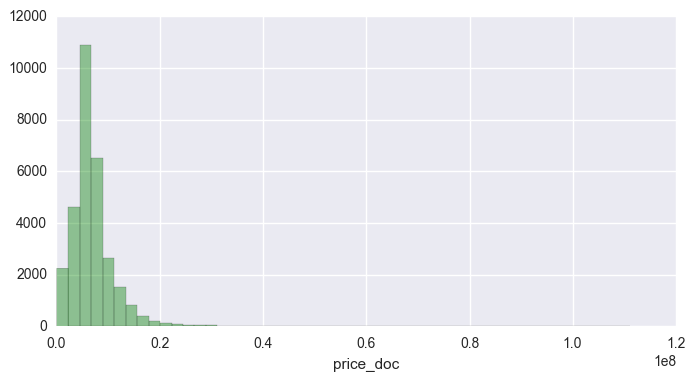

In [11]:
price = train_moscowhd['price_doc']
plt.figure(figsize=(8,4))
sns.distplot(price, kde=False, color = 'g')

MISSING DATA 

In [13]:
na_train_moscowhd = (train_moscowhd.isnull().sum() / len(train_moscowhd)) * 100
na_train_moscowhd = na_train_moscowhd.drop(na_train_moscowhd[na_train_moscowhd == 0].index).sort_values(ascending=False)

In [14]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='100')
sns.barplot(x=na_train_moscowhd.index, y=na_train_moscowhd, palette = "Greens_r")
ax.set(title='Percent missing data by feature', ylabel='% missing')

[<matplotlib.text.Text at 0x115147e90>, <matplotlib.text.Text at 0x115141a50>]

The Below interpretation is taken from Trow Walter's Kernal who completed this EDA in R.

Of 292 columns, 51 have missing values. The percentage of values missing ranges from 0.1% in metro_min_walk to 47.4% in hospital_beds_raion.


ACESSING DATA QUALITY IN THE TRAINING SET 

The state feature relates to the condition of an individual property with 4 being the best and 1 being the worst. There was a 33 imputed. My inclination would be to see this as a 3, but other data scientists opted for using the mode. 

In [15]:
train_moscowhd.loc[train_moscowhd['state'] == 33, 'state'] = train_moscowhd['state'].mode().iloc[0]

For build_year, there is a value of 20052009. Logically, we could replace it with 2007. 

In [16]:
train_moscowhd.loc[train_moscowhd['build_year'] == 20052009, 'build_year'] = 2007

4965 should be 1965 

In [17]:
train_moscowhd.loc[train_moscowhd['build_year'] == 4965, 'build_year'] = 1965

INTERRIOR CHARACTERISTICS (Let's make a heatmap)

In [18]:
interrior_specs = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'price_doc']
corrmat = train_moscowhd[interrior_specs].corr()

In [ ]:
#material, product_type, & sub_area left out on Rustam Agzamov

In [19]:
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True, cmap="Greens_r")


In [20]:
#Added features left out 

interrior_specs = ['full_sq', 'life_sq', 'floor', 'max_floor', 'build_year', 'num_room', 'kitch_sq', 'state', 'material', 'product_type', 'sub_area', 'price_doc']
corrmat = train_moscowhd[interrior_specs].corr()

In [21]:
f, ax = plt.subplots(figsize=(10, 10))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True,cmap="Greens_r" )


Area of Home and Number of Rooms 

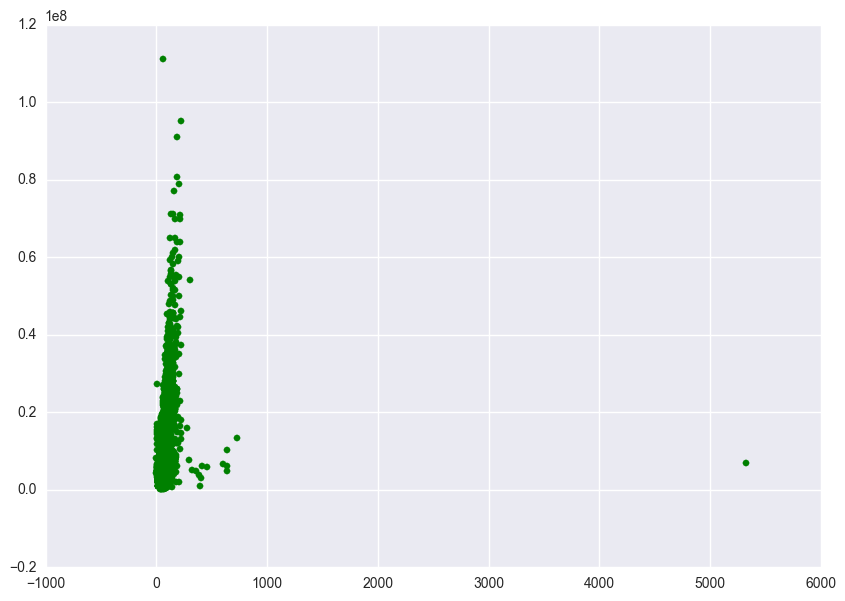

In [22]:
f, ax = plt.subplots(figsize=(10, 7))
plt.scatter(x=train_moscowhd['full_sq'], y=train_moscowhd['price_doc'], color= 'g')

We need to remove the outlier. 

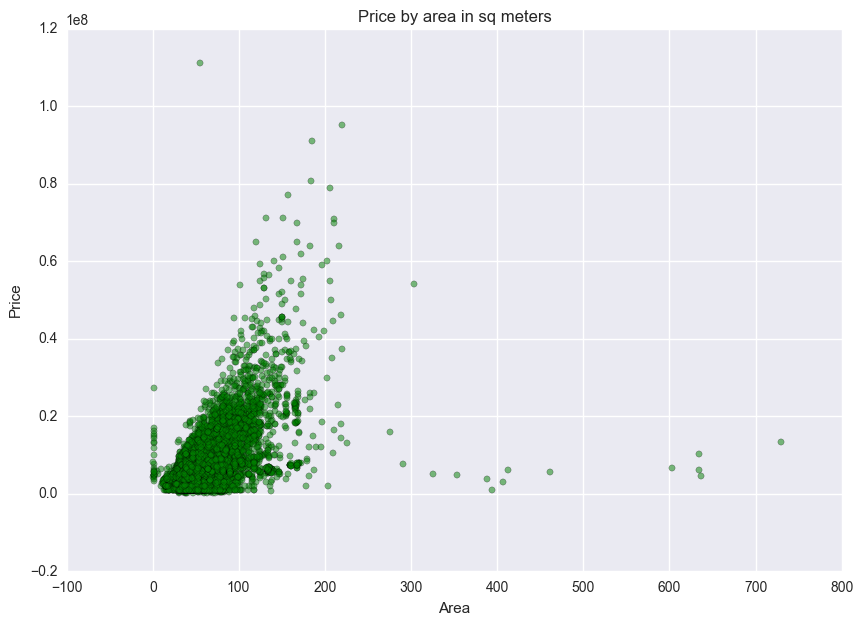

In [23]:
f, ax = plt.subplots(figsize=(10, 7))
ind = train_moscowhd[train_moscowhd['full_sq'] > 2000].index
plt.scatter(x=train_moscowhd.drop(ind)['full_sq'], y=train_moscowhd.drop(ind)['price_doc'], c='g', alpha=0.5)
ax.set(title='Price by area in sq meters', xlabel='Area', ylabel='Price')

In [24]:
(train_moscowhd['life_sq'] > train_moscowhd['full_sq']).sum()

37

In [ ]:
#There are 37 observations where life_sq is greater than full_sq.

[<matplotlib.text.Text at 0x11868ab50>, <matplotlib.text.Text at 0x11064cd90>]

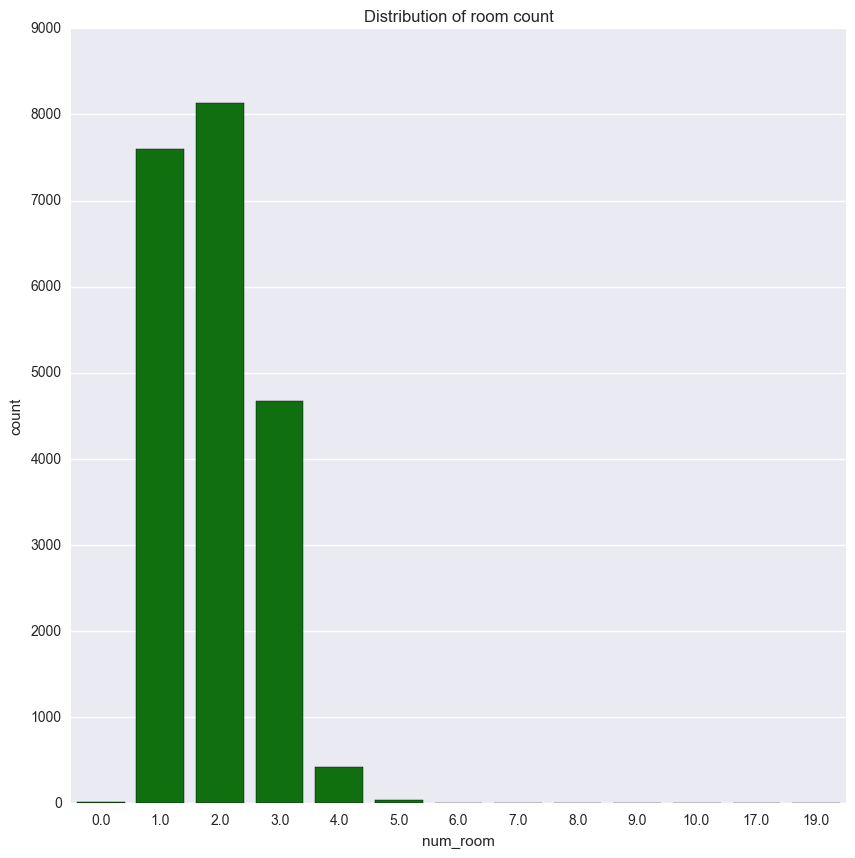

In [25]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x=train_moscowhd['num_room'], color = 'g')
ax.set(title='Distribution of room count', xlabel='num_room')

The Majority of Apartments in Moscow have three rooms or less 

BUILD YEAR 


There are a number of nonsensical years - 0, 1, 3, 20, 71, 215, 2018, and 4965. The 1691 I guess is possible. In another kernel, I plan on setting these to NA and using the mice package to impute these values. For now, let’s limit our visualizations to the reasonable years:

In [16]:
# f, ax = plt.subplots(figsize=(12, 12))
# plt.xticks(rotation='90')
# ind = train_moscowhd[(train_moscowhd['build_year'] <= 1691) | (train_moscowhd['build_year'] >= 2018)].index
# lol = train_moscowhd.drop(ind).sort_values['build_year']
# sns.countplot(x=by_df['build_year'], palette = "Greens")
# ax.set(title='Distribution of build year')
# #this worked last week. 

This is  bimodal with a peak in the 1970s and somewhere and in the past few years.

Now let’s see if build_year and prices are related. Here I group the data by year and take the mean of price_doc.

In [17]:
# f, ax = plt.subplots(figsize=(12, 6))
# by_price = by_df.groupby('build_year')[['build_year', 'price_doc']].mean()
# sns.regplot(x="build_year", y="price_doc", data=by_price, scatter=False, order=3, truncate=True)
# plt.plot(by_price['build_year'], by_price['price_doc'], color='g')
# ax.set(title='Mean price by year of build')

The relationship appears somewhat steady over time, especially after 1960. There is some volatility in the earlier years. This is not a real effect but simply due to the sparseness of observations until around 1950

SALE TYPE

In [28]:
#These need titles 
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
train_moscowhd.drop(train_moscowhd['product_type'] == 'Investment')["price_doc_log"].plot.kde(ax=ax[0], color = 'g')
train_moscowhd.drop(train_moscowhd['product_type'] == 'OwnerOccupier')["price_doc_log"].plot.kde(ax=ax[1], color = 'g')
ax[0].set(xlabel='price_log')
ax[1].set(xlabel='price_log')

In [29]:
train_moscowhd.groupby('product_type')['price_doc'].median()

product_type
Investment       6670000
OwnerOccupier    5564090
Name: price_doc, dtype: int64

Homes sold for investment sell for more than homes sold to owner-occupiers.



TIMESTAMP
How does the sale price vary over time in the data set? 

In [30]:
f, ax = plt.subplots(figsize=(12, 6))
ts_df = train_moscowhd.groupby('timestamp')[['price_doc']].median()
#sns.regplot(x="timestamp", y="price_doc", data=ts_df, scatter=False, truncate=True)
plt.plot(ts_df.index, ts_df['price_doc'], color='g')
ax.set(title='Daily median price over time')

[<matplotlib.text.Text at 0x1159bb490>, <matplotlib.text.Text at 0x116ab6090>]

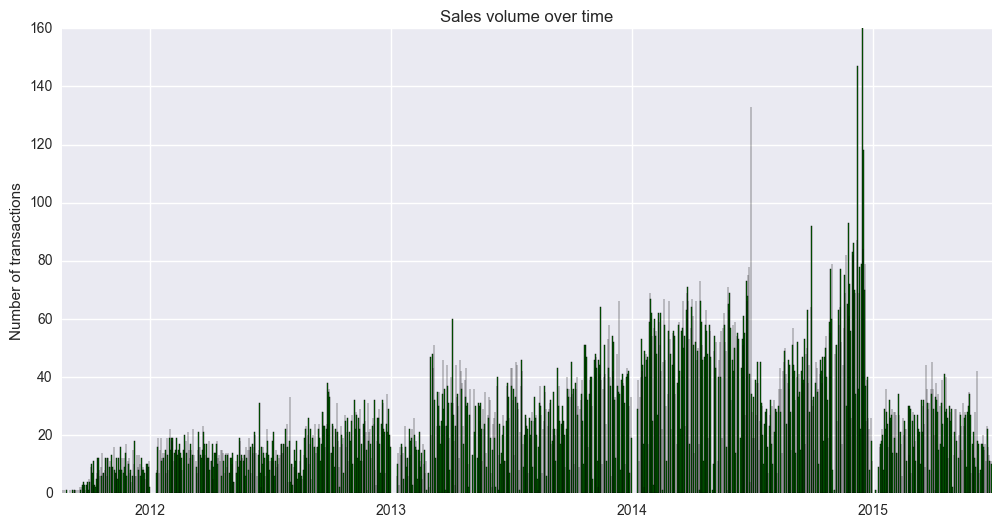

In [31]:
import datetime
import matplotlib.dates as mdates
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%Y')
ts_vc = train_moscowhd['timestamp'].value_counts()
f, ax = plt.subplots(figsize=(12, 6))
plt.bar(left=ts_vc.index, height=ts_vc, color = 'g')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.set(title='Sales volume over time', ylabel='Number of transactions')

MEDIAN HOUSING PRICES PER MONTH OF THE YEAR 

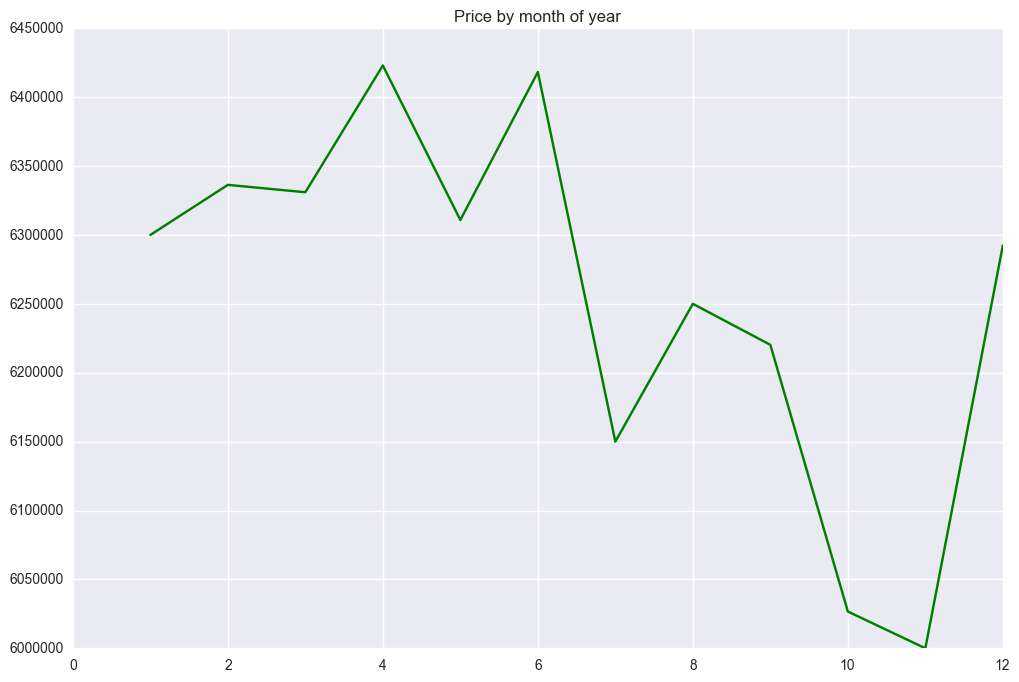

In [32]:
f, ax = plt.subplots(figsize=(12, 8))
ts_df = train_moscowhd.groupby(by=[train_moscowhd.timestamp.dt.month])[['price_doc']].median()
plt.plot(ts_df.index, ts_df, color='g')
ax.set(title='Price by month of year')

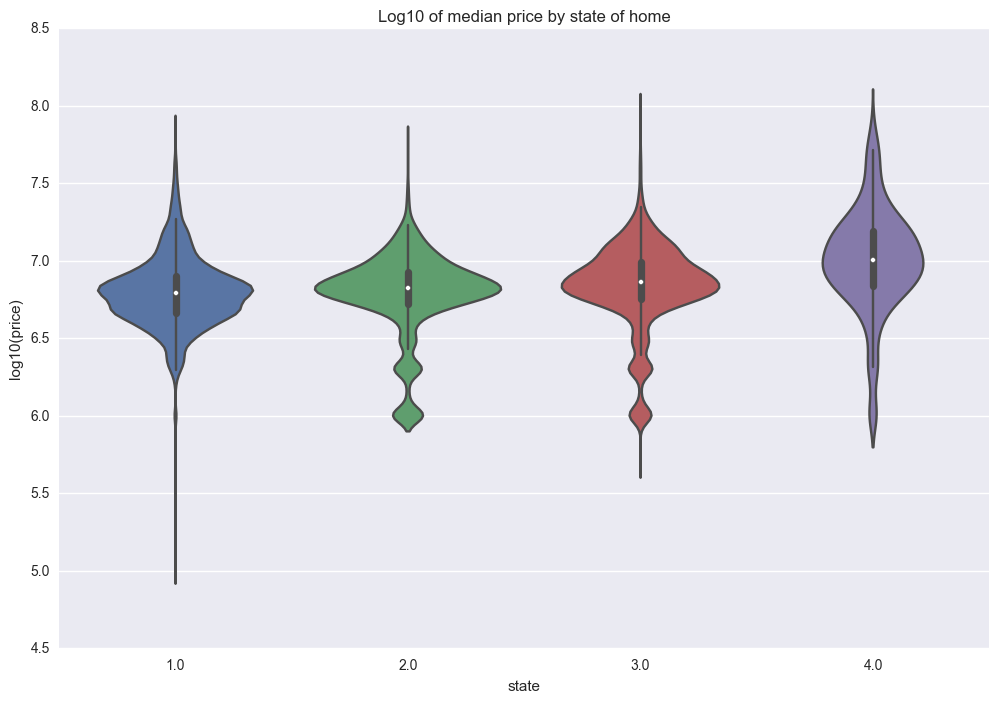

In [33]:
f, ax = plt.subplots(figsize=(12, 8))
ind = train_moscowhd[train_moscowhd['state'].isnull()].index
train_moscowhd['price_doc_log10'] = np.log10(train_moscowhd['price_doc'])
sns.violinplot(x="state", y="price_doc_log10", data=train_moscowhd.drop(ind), inner="box")
ax.set(title='Log10 of median price by state of home', xlabel='state', ylabel='log10(price)')

State 4 has the highest average house prices!

In [34]:
train_moscowhd.drop(ind).groupby('state')['price_doc'].mean()


state
1.0    7.315440e+06
2.0    7.060396e+06
3.0    8.078316e+06
4.0    1.334547e+07
Name: price_doc, dtype: float64

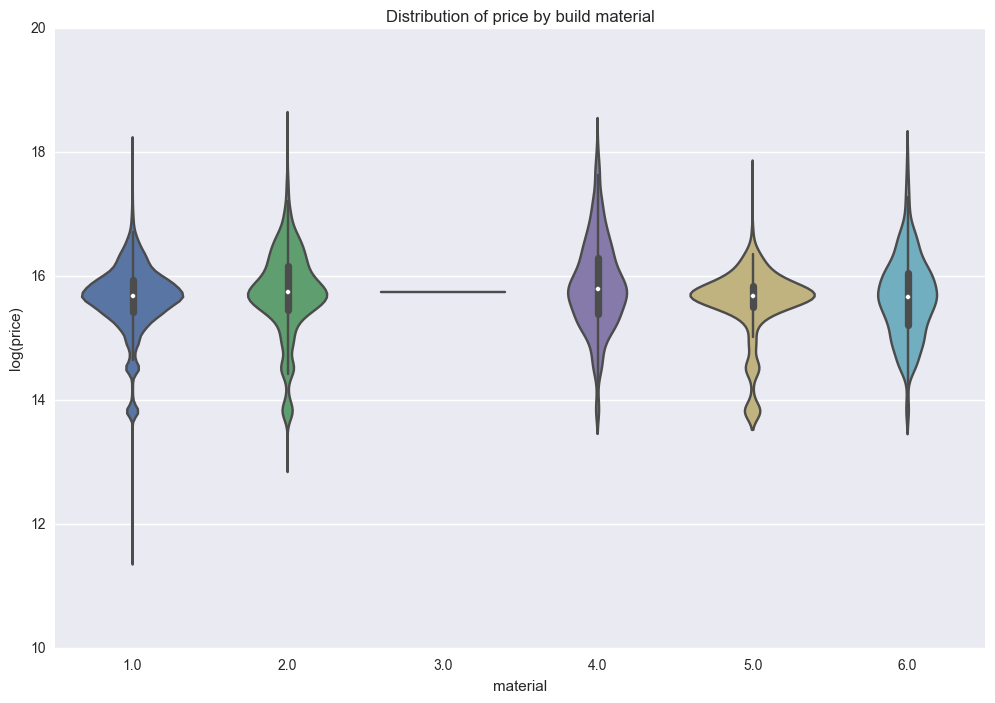

In [35]:
f, ax = plt.subplots(figsize=(12, 8))
ind = train_moscowhd[train_moscowhd['material'].isnull()].index
sns.violinplot(x="material", y="price_doc_log", data=train_moscowhd.drop(ind), inner="box")
# sns.swarmplot(x="state", y="price_doc_log10", data=train_df.dropna(), color="w", alpha=.2);
ax.set(title='Distribution of price by build material', xlabel='material', ylabel='log(price)')

In [36]:
train_moscowhd.drop(ind).groupby('material')['price_doc'].median()

material
1.0    6500000.0
2.0    6900000.0
3.0    6931143.0
4.0    7247869.5
5.0    6492000.0
6.0    6362318.0
Name: price_doc, dtype: float64

The above vaules are not important because they are not defined in the readme! The 4th kind of material seems to have the most value! 

FLOOR LEVEL AND PRICE 

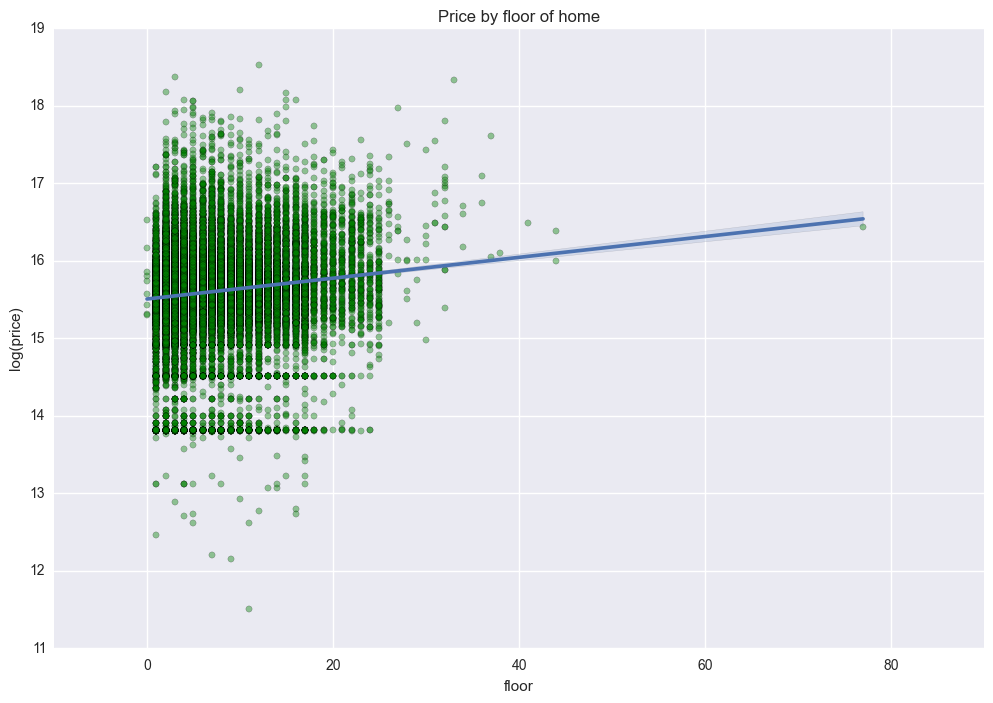

In [37]:
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train_moscowhd['floor'], y=train_moscowhd['price_doc_log'], c='g', alpha=0.4)
sns.regplot(x="floor", y="price_doc_log", data=train_moscowhd, scatter=False, truncate=True)
ax.set(title='Price by floor of home', xlabel='floor', ylabel='log(price)')

In [ ]:
#This is a very moderate positive correlation. Floor level minimally affects price. 

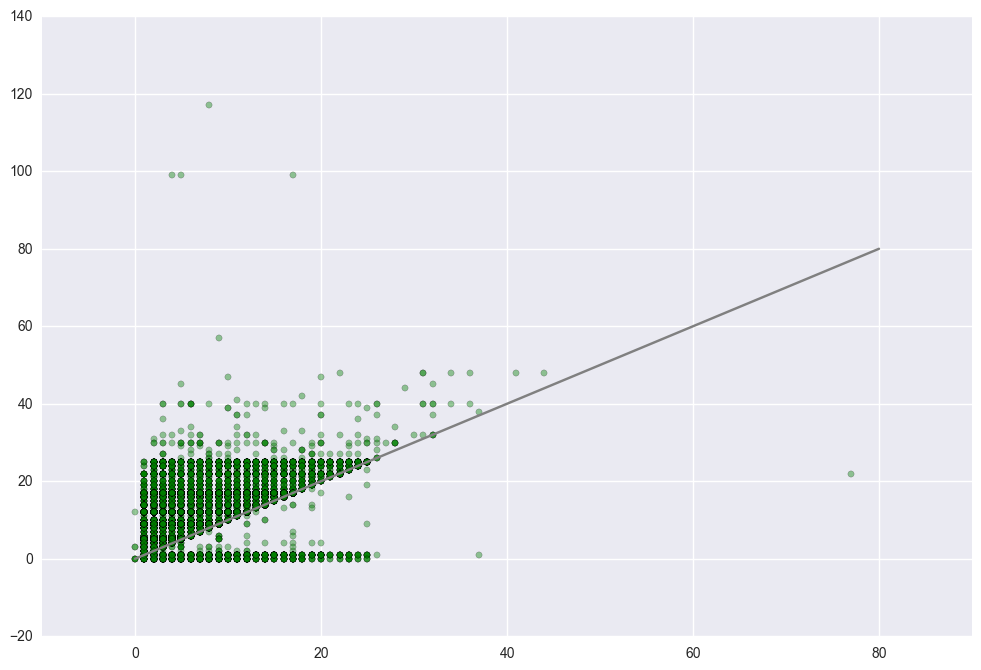

In [38]:
f, ax = plt.subplots(figsize=(12, 8))
plt.scatter(x=train_moscowhd['floor'], y=train_moscowhd['max_floor'], c='g', alpha=0.4)
plt.plot([0, 80], [0, 80], color='.5')

Here there is also a slight positive correlation. When thinking about the dynamic of Moscow, the urban core has both the tallest buidlings and the most expensive rents. For this reason, we cannot say that hight alone is the biggest determinant of housing price in Moscow. 

We should look to see if there are instances if the floor is greater than Max Floor 

In [39]:
train_moscowhd.loc[train_moscowhd['max_floor'] < train_moscowhd['floor'], ['id', 'floor','max_floor']]

id  floor  max_floor
8216    8219   13.0        0.0
8268    8271    3.0        1.0
8499    8502    2.0        0.0
8531    8534    7.0        0.0
8912    8915    5.0        0.0
9161    9164    8.0        3.0
9257    9260    8.0        1.0
9309    9312    5.0        1.0
9388    9391   10.0        1.0
9412    9415    4.0        1.0
9423    9426    8.0        0.0
9442    9445    9.0        1.0
9452    9455    8.0        1.0
9482    9485   12.0        1.0
9561    9564    7.0        1.0
9689    9692    2.0        1.0
9696    9699    2.0        1.0
9724    9727    7.0        1.0
9764    9767   24.0        1.0
9822    9825   14.0        1.0
9855    9858   21.0        1.0
9910    9913    8.0        1.0
9922    9925    7.0        1.0
9969    9972   20.0        1.0
9995    9998   14.0        1.0
10079  10082    3.0        1.0
10086  10089   13.0        0.0
10112  10115    3.0        1.0
10135  10138    7.0        1.0
10142  10145   11.0        0.0
...      ...    ...        ...
30094  30097   12.0        1.0
30111  30114    3.0        0.0
30114  30117    2.0        0.0
30116  30119   20.0        1.0
30140  30143    2.0        0.0
30150  30153    6.0        1.0
30187  30190    6.0        0.0
30188  30191    5.0        1.0
30201  30204    8.0        1.0
30206  30209    9.0        0.0
30217  30220   12.0        1.0
30221  30224    2.0        0.0
30225  30228    3.0        2.0
30233  30236   17.0        1.0
30234  30237    3.0        1.0
30244  30247    2.0        1.0
30257  30260    7.0        2.0
30262  30265   14.0        1.0
30273  30276   12.0        0.0
30299  30302    8.0        0.0
30317  30320    8.0        1.0
30341  30344   22.0        1.0
30353  30356    9.0        1.0
30360  30363   14.0        1.0
30391  30394    3.0        1.0
30398  30401    5.0        1.0
30400  30403    3.0        0.0
30426  30429    1.0        0.0
30439  30442   12.0        0.0
30450  30453    5.0        0.0

[1493 rows x 3 columns]

In [ ]:
#Almost 1500 data-entry errors. Yikes! 

DEMOGRAPHIC DATA 

In [40]:
demographic_features = ['area_m', 'raion_popul', 'full_all', 'male_f', 'female_f', 'young_all', 'young_female', 
             'work_all', 'work_male', 'work_female', 'price_doc']
corrmat = train_moscowhd[demographic_features].corr()

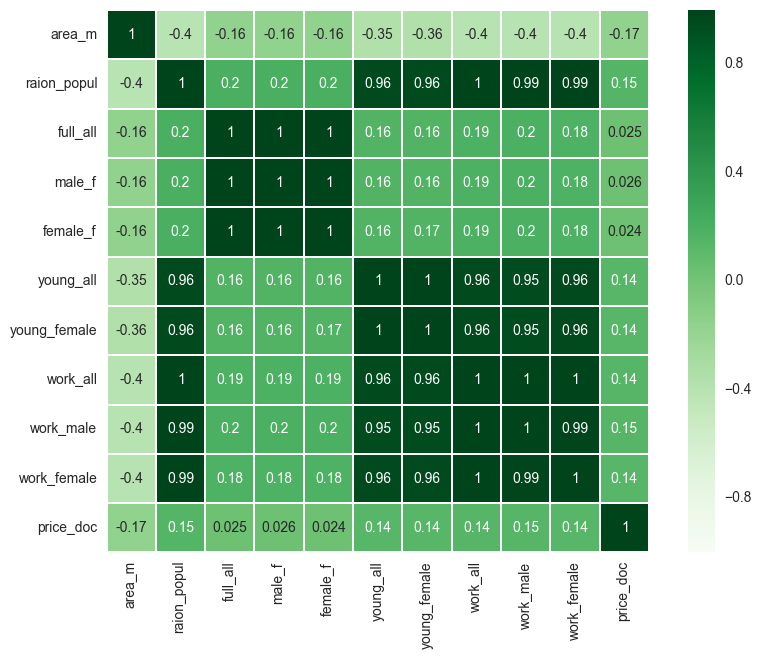

In [41]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True, cmap="Greens")

Some correlation but not strong association. 

In [42]:
train_moscowhd['sub_area'].unique().shape[0]

146

According to Troy Walter's Kaggle Submission: 

As I understand it, Moscow is divided into okrugs that are further divided into raions. These raions are the areas named in the sub_area column. Let’s divide area_m (in sq meters) by 1000000 to get the sub_area area in square kilometers. Then we will divide raion_popul by area_km to get the population density for the raion. To verify that these are correct, I’ve cross-checked these numbers

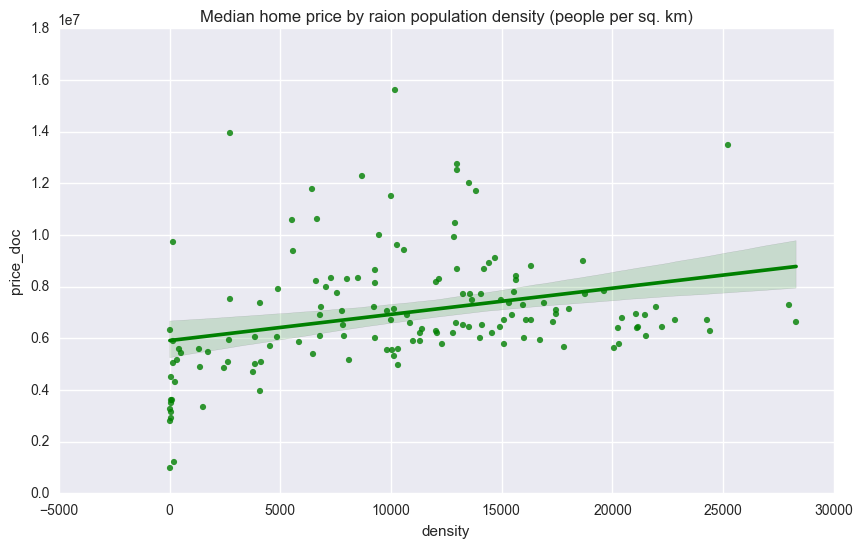

In [43]:
train_moscowhd['area_km'] = train_moscowhd['area_m'] / 1000000
train_moscowhd['density'] = train_moscowhd['raion_popul'] / train_moscowhd['area_km']
f, ax = plt.subplots(figsize=(10, 6))
sa_price = train_moscowhd.groupby('sub_area')[['density', 'price_doc']].median()
sns.regplot(x="density", y="price_doc", data=sa_price, scatter=True, truncate=True, color='g')
ax.set(title='Median home price by raion population density (people per sq. km)')

Moscow as a whole is 8,537/sq km
Home price does seem to increase with population density.

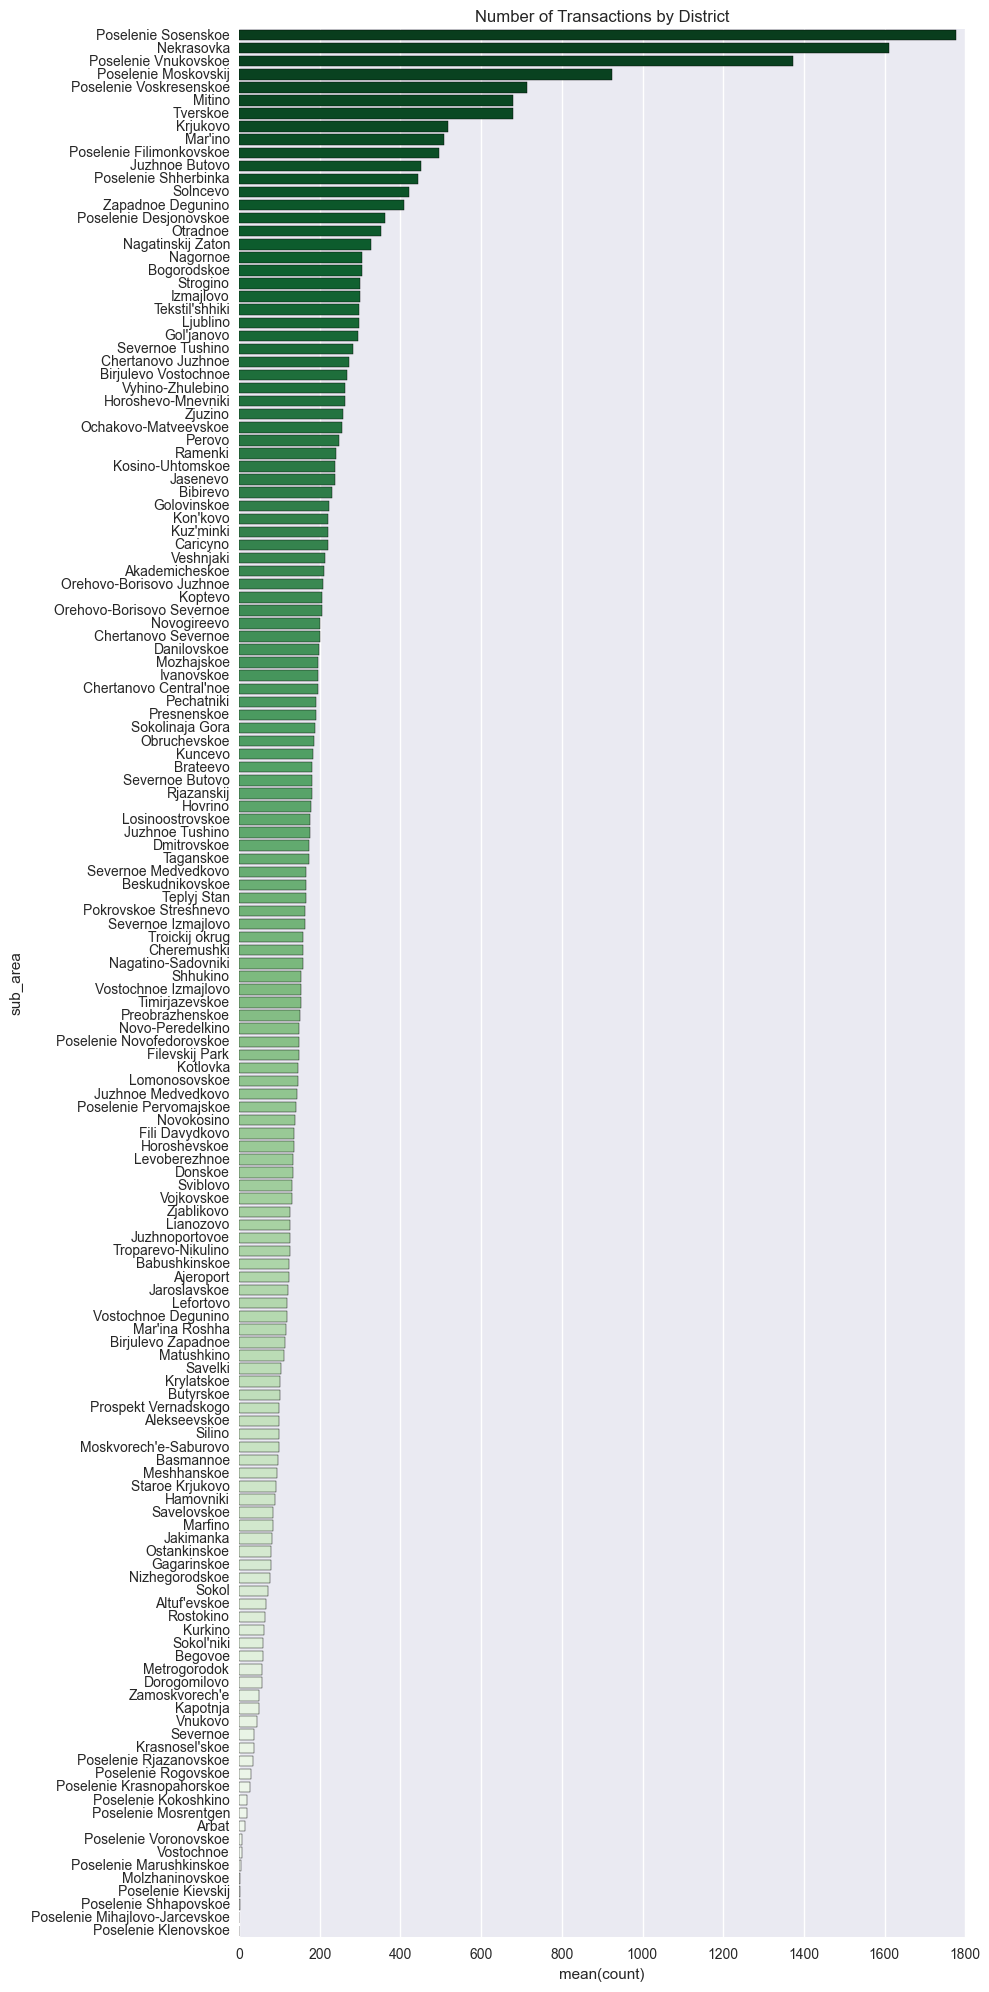

In [44]:
f, ax = plt.subplots(figsize=(10, 20))
sa_vc = train_moscowhd['sub_area'].value_counts()
sa_vc = pd.DataFrame({'sub_area':sa_vc.index, 'count': sa_vc.values})
ax = sns.barplot(x="count", y="sub_area", data=sa_vc, orient="h", palette = "Greens_r")
ax.set(title='Number of Transactions by District')
f.tight_layout()

Poselenie Sosenskoe, Nekrasovka, Poselenie Vnukovskoe had the most transactions in the data set by a fairly large margin.

Is there a relationship a relationship between the mean home price in a district and the district’s share of working age population?



In [45]:
train_moscowhd['work_share'] = train_moscowhd['work_all'] / train_moscowhd['raion_popul']
f, ax = plt.subplots(figsize=(12, 6))
sa_price = train_moscowhd.groupby('sub_area')[['work_share', 'price_doc']].mean()
sns.regplot(x="work_share", y="price_doc", data=sa_price, scatter=True, order=4, truncate=True, color='g')
ax.set(title='District mean home price by share of working age population')

Not a clear relationship! 

SCHOOL CHARACTERISTICS

In [46]:
school_characteristics = ['children_preschool', 'preschool_quota', 'preschool_education_centers_raion', 'children_school', 
                'school_quota', 'school_education_centers_raion', 'school_education_centers_top_20_raion', 
                'university_top_20_raion', 'additional_education_raion', 'additional_education_km', 'university_km', 'price_doc']
corrmat = train_moscowhd[school_characteristics].corr()

In [47]:
f, ax = plt.subplots(figsize=(10, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True, cmap="Greens_r")

The only variable that has some correlation is university_top_20_raion.

In [48]:
train_moscowhd['university_top_20_raion'].unique()

array([0, 2, 1, 3])

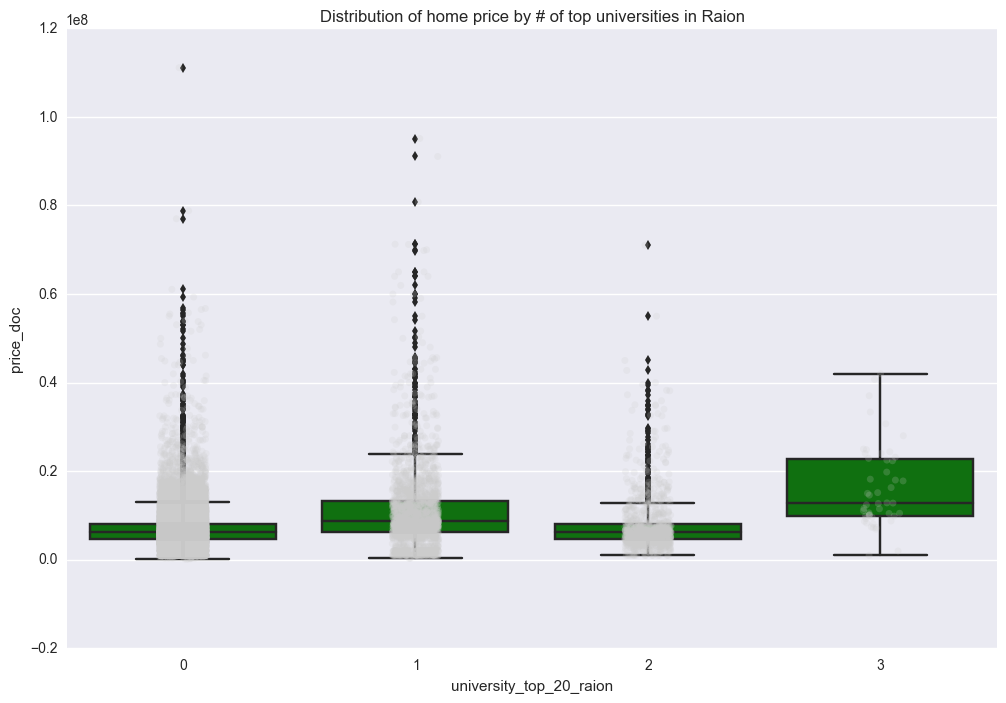

In [49]:
f, ax = plt.subplots(figsize=(12, 8))
sns.stripplot(x="university_top_20_raion", y="price_doc", data=train_moscowhd, jitter=True, alpha=.2, color=".8");
sns.boxplot(x="university_top_20_raion", y="price_doc", data=train_moscowhd, color ="g")
ax.set(title='Distribution of home price by # of top universities in Raion', xlabel='university_top_20_raion', 
       ylabel='price_doc')

Homes in a raion with 3 top 20 universities have the highest median home price, however, it is fairly close among 0, 1, and 2. There are very few homes with 3 top universites in their raion. Let’s see how many districts there are with three universities

Which raions contains more than three universities?

CULTURAL CHARACTERISTICS 

In [50]:
cult_characteristics = ['sport_objects_raion', 'culture_objects_top_25_raion', 'shopping_centers_raion', 'park_km', 'fitness_km', 
                'swim_pool_km', 'ice_rink_km','stadium_km', 'basketball_km', 'shopping_centers_km', 'big_church_km',
                'church_synagogue_km', 'mosque_km', 'theater_km', 'museum_km', 'exhibition_km', 'catering_km', 'price_doc']
corrmat = train_moscowhd[cult_characteristics].corr()

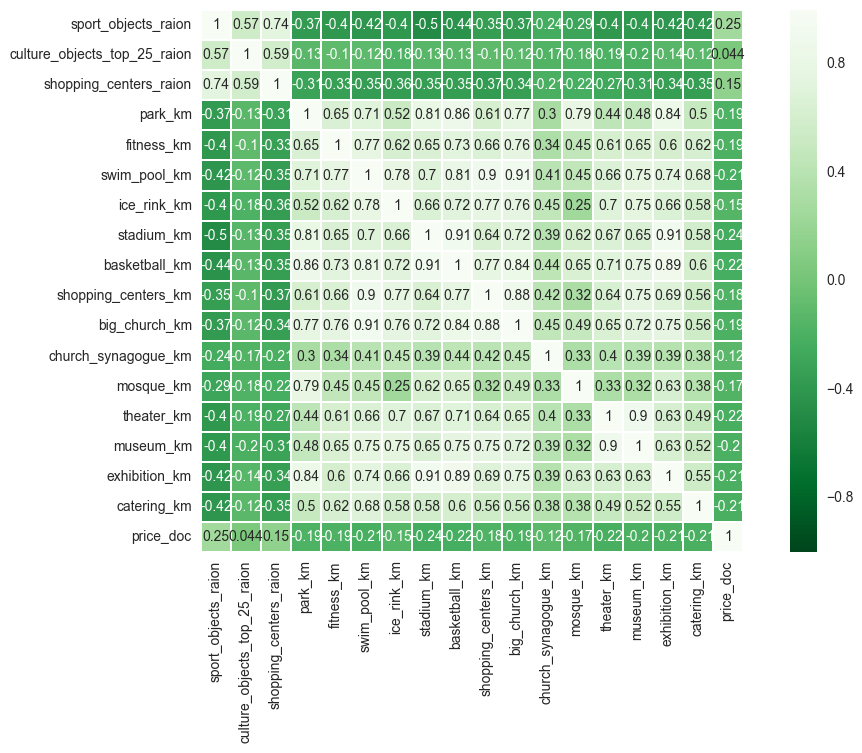

In [51]:
f, ax = plt.subplots(figsize=(12, 7))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True, cmap="Greens_r")

In [52]:
f, ax = plt.subplots(figsize=(10, 6))
so_price = train_moscowhd.groupby('sub_area')[['sport_objects_raion', 'price_doc']].median()
sns.regplot(x="sport_objects_raion", y="price_doc", data=so_price, scatter=True, truncate=True, color='g')
ax.set(title='Median Raion home price by number of sports objects in Raion')

Definite positivie correlation. This is probably a feature to include when modeling! 

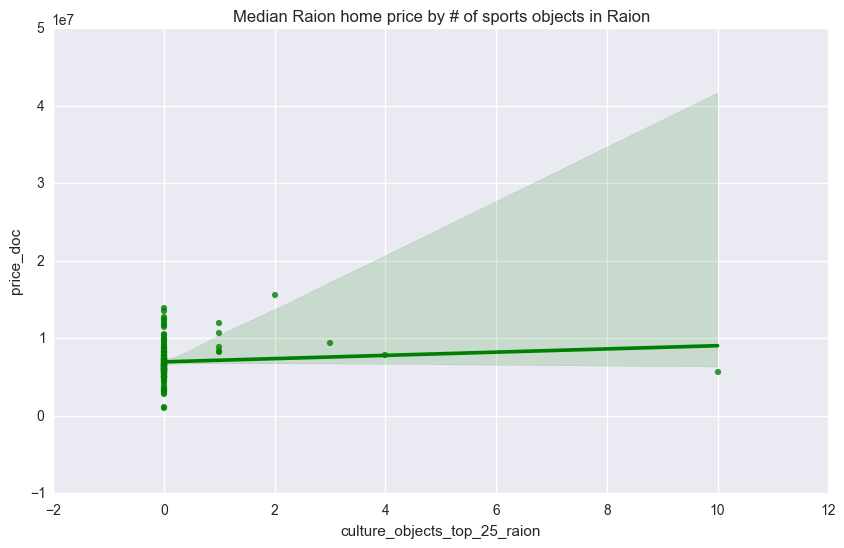

In [54]:
f, ax = plt.subplots(figsize=(10, 6))
co_price = train_moscowhd.groupby('sub_area')[['culture_objects_top_25_raion', 'price_doc']].median()
sns.regplot(x="culture_objects_top_25_raion", y="price_doc", data=co_price, scatter=True, truncate=True, color = 'g')
ax.set(title='Median Raion home price by # of sports objects in Raion')

Numerous raions don't have cultural objects. We should get an idea of how many do not!

In [55]:
train_moscowhd.groupby('culture_objects_top_25')['price_doc'].median()

culture_objects_top_25
no     6200000
yes    7400000
Name: price_doc, dtype: int64

1.2 million difference based on weather or not a top 25 cultural object is located in a raion!

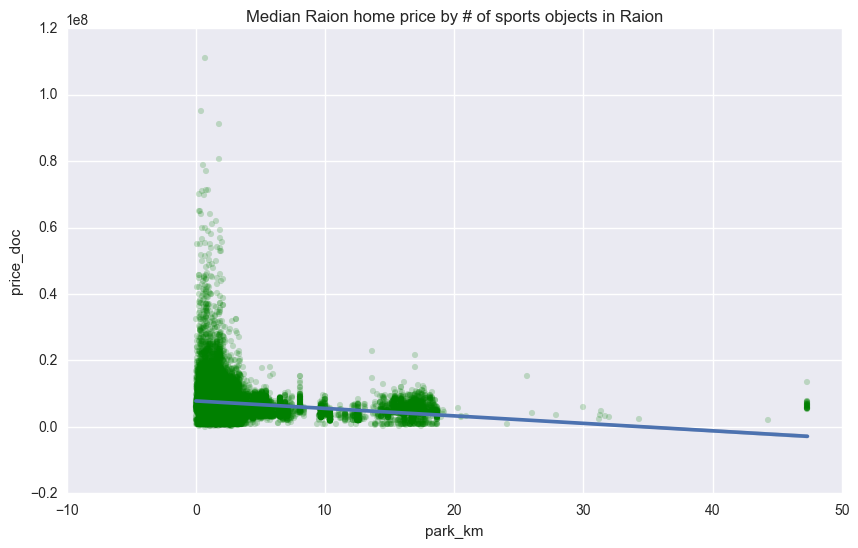

In [56]:
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="park_km", y="price_doc", data=train_moscowhd, scatter=True, truncate=True, scatter_kws={'color': 'g', 'alpha': .2})
ax.set(title='Median Raion home price by # of sports objects in Raion')

Slight negative correlation! 

In [23]:
infras_features = ['nuclear_reactor_km', 'thermal_power_plant_km', 'power_transmission_line_km', 'incineration_km',
                'water_treatment_km', 'incineration_km', 'railroad_station_walk_km', 'railroad_station_walk_min', 
                'railroad_station_avto_km', 'railroad_station_avto_min', 'public_transport_station_km', 
                'public_transport_station_min_walk', 'water_km', 'mkad_km', 'ttk_km', 'sadovoe_km','bulvar_ring_km',
                'kremlin_km', 'price_doc']
corrmat = train_moscowhd[infras_features].corr()

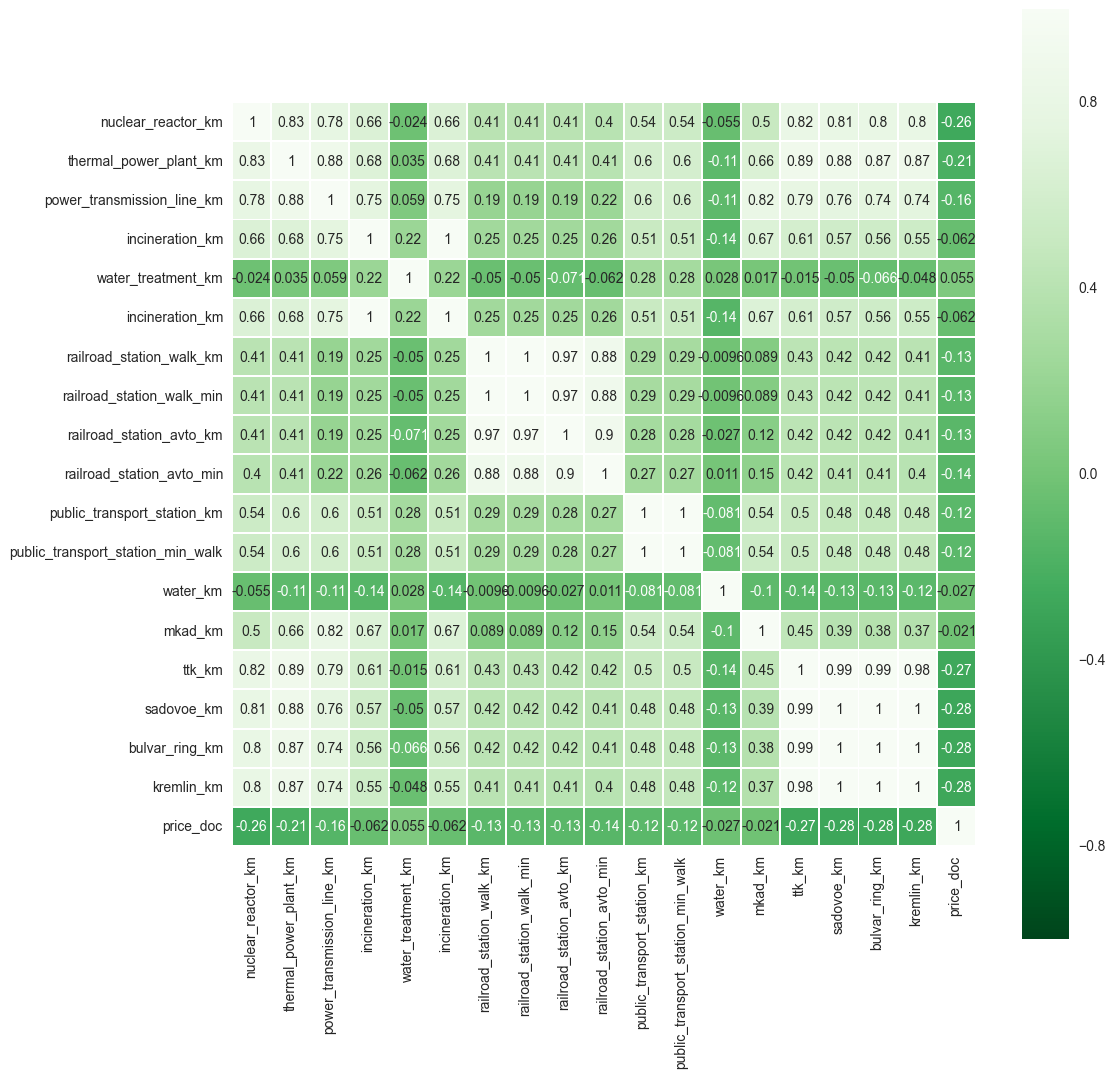

In [25]:
f, ax = plt.subplots(figsize=(12, 12))
plt.xticks(rotation='90')
sns.heatmap(corrmat, square=True, linewidths=.5, annot=True, cmap="Greens_r")

In [59]:
f, ax = plt.subplots(figsize=(10, 6))
sns.regplot(x="kremlin_km", y="price_doc", data=train_moscowhd, scatter=True, truncate=True, scatter_kws={'color': 'g', 'alpha': .2})
ax.set(title='Home price by distance to Kremlin')

MULTICOLLINIARITY IN TRAINING SET  



In [61]:
# from subprocess import check_output
# # print(check_output(["ls", "../input"]).decode("utf8"))

# # Any results you write to the current directory are saved as output.

# # Extra imports necessary for the code

# from sklearn.base import BaseEstimator, TransformerMixin
# from sklearn.preprocessing import Imputer

# from statsmodels.stats.outliers_influence import variance_inflation_factor

In [62]:
X = pd.read_csv('~/Desktop/Russian_Housing/train.csv', parse_dates=['timestamp'])
y = X.pop('price_doc')
X.head()

id  timestamp  full_sq  life_sq  floor  max_floor  material  build_year  \
0   1 2011-08-20       43     27.0    4.0        NaN       NaN         NaN   
1   2 2011-08-23       34     19.0    3.0        NaN       NaN         NaN   
2   3 2011-08-27       43     29.0    2.0        NaN       NaN         NaN   
3   4 2011-09-01       89     50.0    9.0        NaN       NaN         NaN   
4   5 2011-09-05       77     77.0    4.0        NaN       NaN         NaN   

   num_room  kitch_sq  state product_type           sub_area        area_m  \
0       NaN       NaN    NaN   Investment           Bibirevo  6.407578e+06   
1       NaN       NaN    NaN   Investment  Nagatinskij Zaton  9.589337e+06   
2       NaN       NaN    NaN   Investment     Tekstil'shhiki  4.808270e+06   
3       NaN       NaN    NaN   Investment             Mitino  1.258354e+07   
4       NaN       NaN    NaN   Investment          Basmannoe  8.398461e+06   

   raion_popul  green_zone_part  indust_part  children_preschool  \
0       155572         0.189727     0.000070                9576   
1       115352         0.372602     0.049637                6880   
2       101708         0.112560     0.118537                5879   
3       178473         0.194703     0.069753               13087   
4       108171         0.015234     0.037316                5706   

   preschool_quota  preschool_education_centers_raion  children_school  \
0           5001.0                                  5            10309   
1           3119.0                                  5             7759   
2           1463.0                                  4             6207   
3           6839.0                                  9            13670   
4           3240.0                                  7             6748   

   school_quota  school_education_centers_raion  \
0       11065.0                               5   
1        6237.0                               8   
2        5580.0                               7   
3       17063.0                              10   
4        7770.0                               9   

   school_education_centers_top_20_raion  hospital_beds_raion  \
0                                      0                240.0   
1                                      0                229.0   
2                                      0               1183.0   
3                                      0                  NaN   
4                                      0                562.0   

   healthcare_centers_raion  university_top_20_raion  sport_objects_raion  \
0                         1                        0                    7   
1                         1                        0                    6   
2                         1                        0                    5   
3                         1                        0                   17   
4                         4                        2                   25   

   additional_education_raion culture_objects_top_25  \
0                           3                     no   
1                           1                    yes   
2                           1                     no   
3                           6                     no   
4                           2                     no   

   culture_objects_top_25_raion  shopping_centers_raion  office_raion  \
0                             0                      16             1   
1                             1                       3             0   
2                             0                       0             1   
3                             0                      11             4   
4                             0                      10            93   

  thermal_power_plant_raion incineration_raion oil_chemistry_raion  \
0                        no                 no                  no   
1                        no                 no                  no   
2                        no                 no                  

DISCREPANCIES IN TESTING AND TRAINING DATA 

In [63]:
test_moscowhd = pd.read_csv('~/Desktop/Russian_Housing/test.csv', parse_dates=['timestamp'])


In [64]:
test_na_moscowhd = (test_moscowhd.isnull().sum() / len(test_moscowhd)) * 100
test_na_moscowhd = test_na_moscowhd.drop(test_na_moscowhd[test_na_moscowhd == 0].index).sort_values(ascending=False)

[<matplotlib.text.Text at 0x120445e90>, <matplotlib.text.Text at 0x120427b50>]

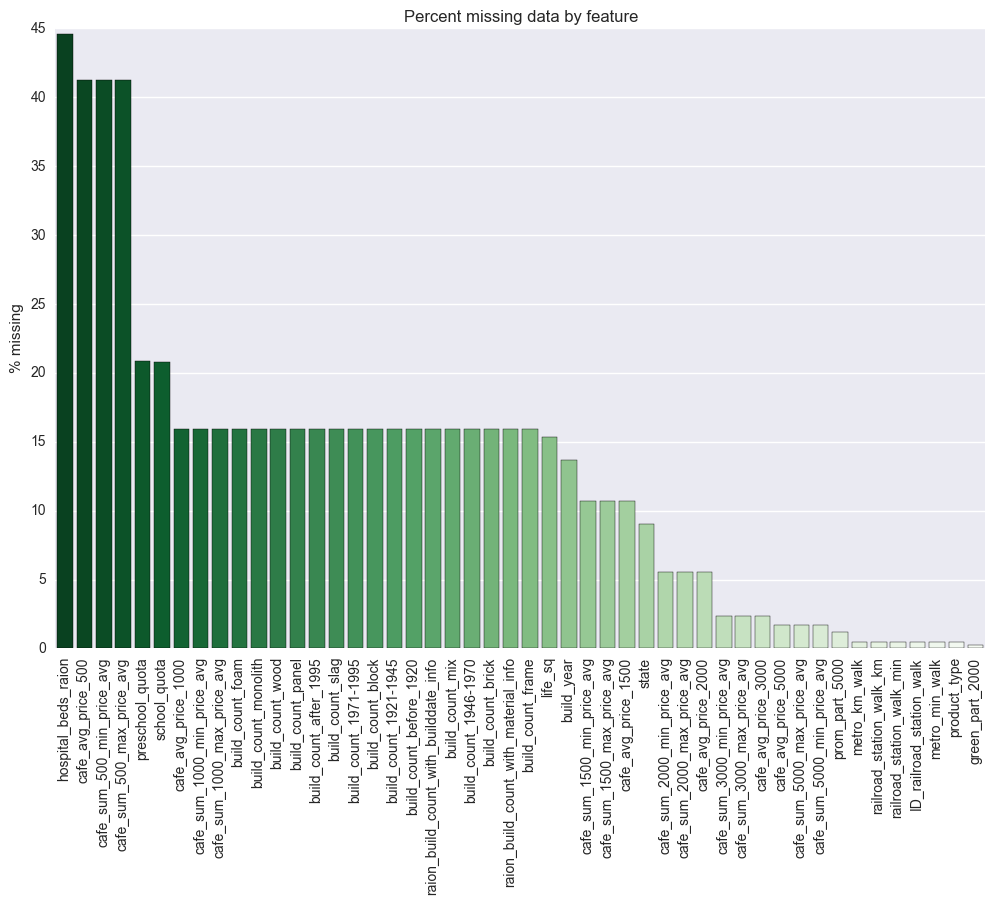

In [65]:
f, ax = plt.subplots(figsize=(12, 8))
plt.xticks(rotation='90')
sns.barplot(x=test_na_moscowhd.index, y=test_na_moscowhd, palette = "Greens_r")
ax.set(title='Percent missing data by feature', ylabel='% missing')

In [66]:
all_data = pd.concat([train_moscowhd.drop('price_doc', axis=1), test_moscowhd])
all_data['dataset'] = ''
l = len(train_moscowhd)
all_data.iloc[:l]['dataset'] = 'train'
all_data.iloc[l:]['dataset'] = 'test'
train_dataset = all_data['dataset'] == 'train'

[<matplotlib.text.Text at 0x13bf2b790>, <matplotlib.text.Text at 0x13bef31d0>]

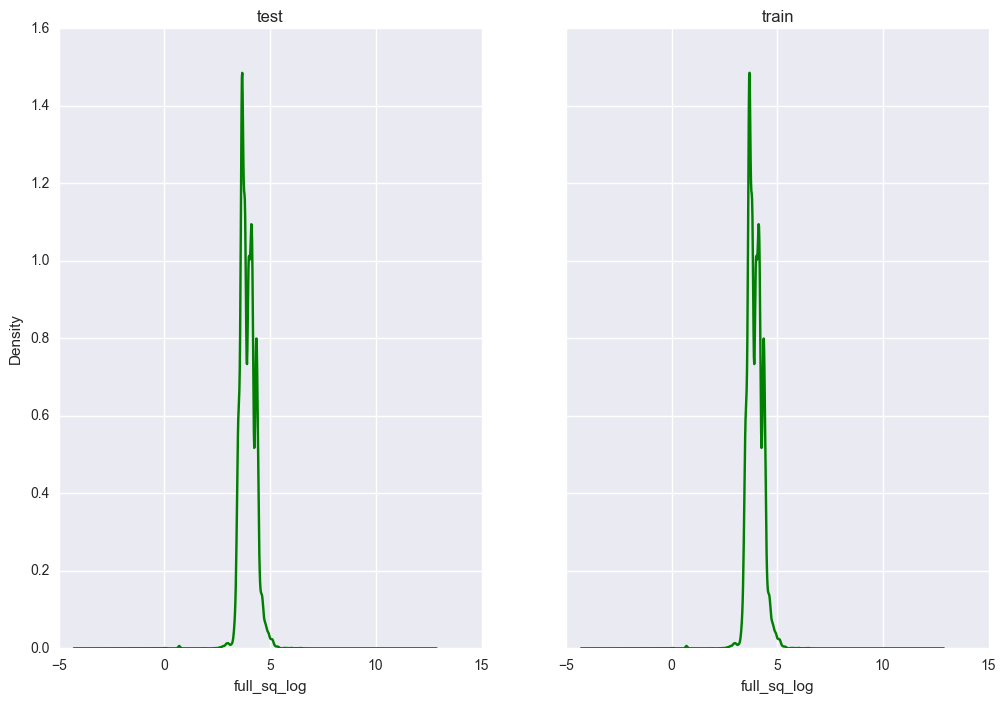

In [67]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data['full_sq_log'] = np.log1p(all_data['full_sq'])
all_data.drop(train_dataset)["full_sq_log"].plot.kde(ax=ax[0], color = 'g')
all_data.drop(~train_dataset)["full_sq_log"].plot.kde(ax=ax[1], color = 'g')
ax[0].set(title='test', xlabel='full_sq_log')
ax[1].set(title='train', xlabel='full_sq_log')

In [68]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data['life_sq_log'] = np.log1p(all_data['life_sq'])
all_data.drop(train_dataset)["life_sq_log"].plot.kde(ax=ax[0], color = 'g')
all_data.drop(~train_dataset)["life_sq_log"].plot.kde(ax=ax[1], color = 'g')
ax[0].set(title='test', xlabel='life_sq_log')
ax[1].set(title='train', xlabel='life_sq_log')

[<matplotlib.text.Text at 0x122d006d0>, <matplotlib.text.Text at 0x122d48e50>]

[<matplotlib.text.Text at 0x121c8e6d0>, <matplotlib.text.Text at 0x12183ef10>]

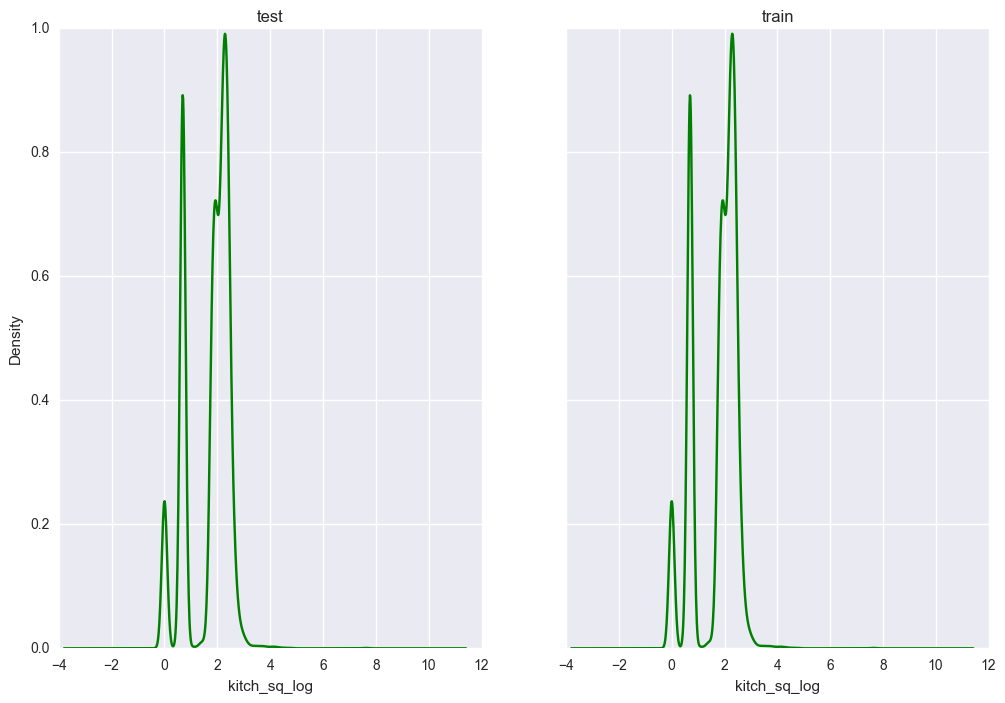

In [69]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data['kitch_sq_log'] = np.log1p(all_data['kitch_sq'])
all_data.drop(train_dataset)["kitch_sq_log"].plot.kde(ax=ax[0], color = 'g')
all_data.drop(~train_dataset)["kitch_sq_log"].plot.kde(ax=ax[1], color = 'g')
ax[0].set(title='test', xlabel='kitch_sq_log')
ax[1].set(title='train', xlabel='kitch_sq_log')

[<matplotlib.text.Text at 0x121810050>, <matplotlib.text.Text at 0x1235d1cd0>]

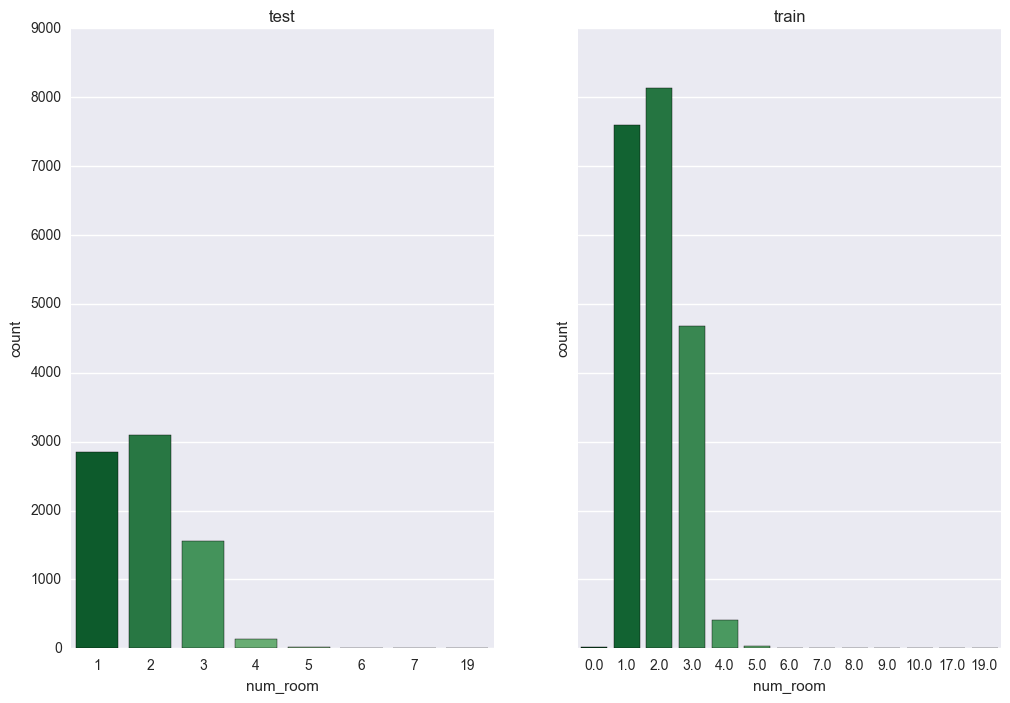

In [70]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
sns.countplot(x=test_moscowhd['num_room'], ax=ax[0], palette = "Greens_r")
sns.countplot(x=train_moscowhd['num_room'], ax=ax[1], palette = "Greens_r")
ax[0].set(title='test', xlabel='num_room')
ax[1].set(title='train', xlabel='num_room')

[<matplotlib.text.Text at 0x123e60e50>, <matplotlib.text.Text at 0x121b3afd0>]

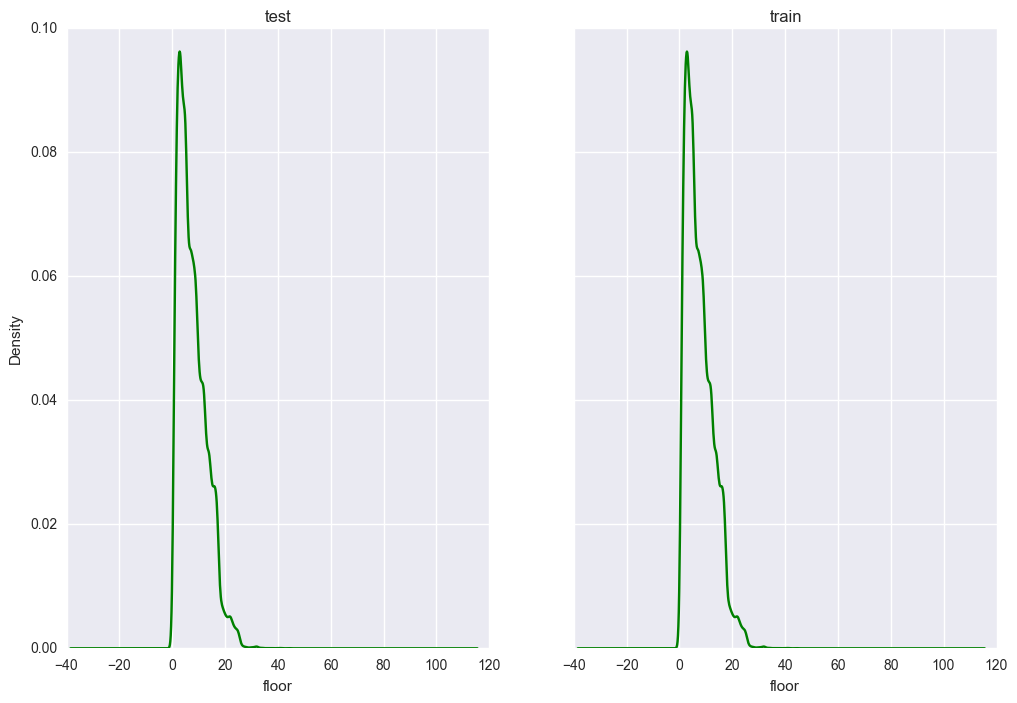

In [71]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data.drop(train_dataset)["floor"].plot.kde(ax=ax[0], color = 'g')
all_data.drop(~train_dataset)["floor"].plot.kde(ax=ax[1], color = 'g')
ax[0].set(title='test', xlabel='floor')
ax[1].set(title='train', xlabel='floor')

In [72]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
all_data.drop(train_dataset)["max_floor"].plot.kde(ax=ax[0], color = 'g')
all_data.drop(~train_dataset)["max_floor"].plot.kde(ax=ax[1], color = 'g')
ax[0].set(title='test', xlabel='max_floor')
ax[1].set(title='train', xlabel='max_floor')

[<matplotlib.text.Text at 0x125130390>, <matplotlib.text.Text at 0x1249f7bd0>]

[<matplotlib.text.Text at 0x123ef2150>, <matplotlib.text.Text at 0x12621a9d0>]

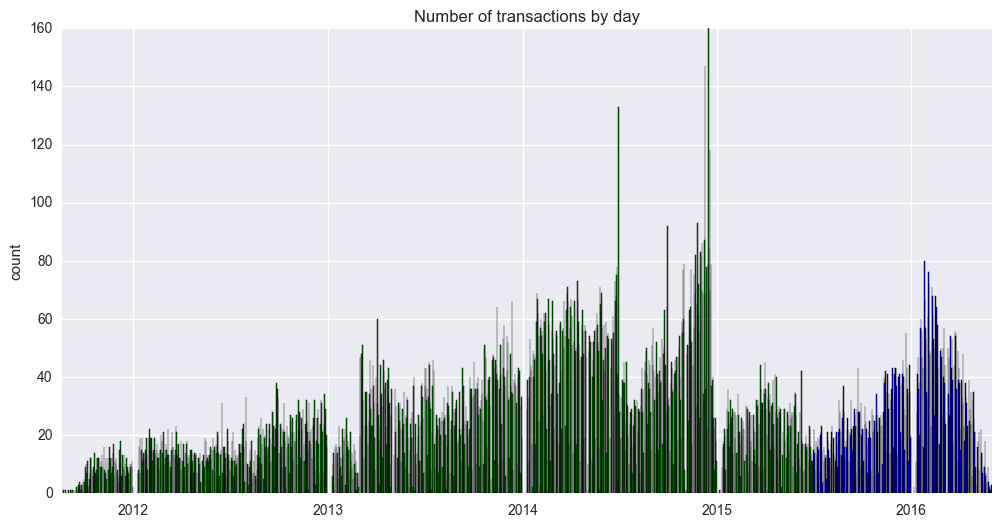

In [73]:
years = mdates.YearLocator()   # every year
yearsFmt = mdates.DateFormatter('%Y')
ts_vc_train = train_moscowhd['timestamp'].value_counts()
ts_vc_test = test_moscowhd['timestamp'].value_counts()
f, ax = plt.subplots(figsize=(12, 6))
plt.bar(left=ts_vc_train.index, height=ts_vc_train, color ="g")
plt.bar(left=ts_vc_test.index, height=ts_vc_test, color = 'b')
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.set(title='Number of transactions by day', ylabel='count')

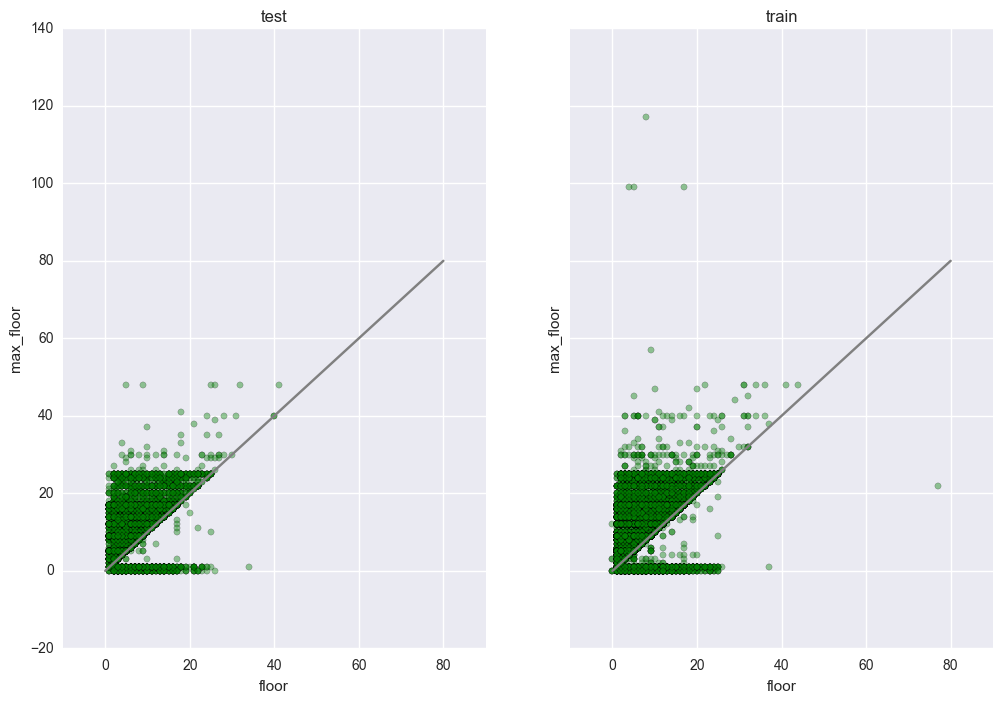

In [74]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
ax[0].scatter(x=test_moscowhd['floor'], y=test_moscowhd['max_floor'], c='g', alpha=0.4)
ax[0].plot([0, 80], [0, 80], color='.5')
ax[1].scatter(x=train_moscowhd['floor'], y=train_moscowhd['max_floor'], c='g', alpha=0.4)
ax[1].plot([0, 80], [0, 80], color='.5')
ax[0].set(title='test', xlabel='floor', ylabel='max_floor')
ax[1].set(title='train', xlabel='floor', ylabel='max_floor')

[<matplotlib.text.Text at 0x133632d10>, <matplotlib.text.Text at 0x133eba590>]

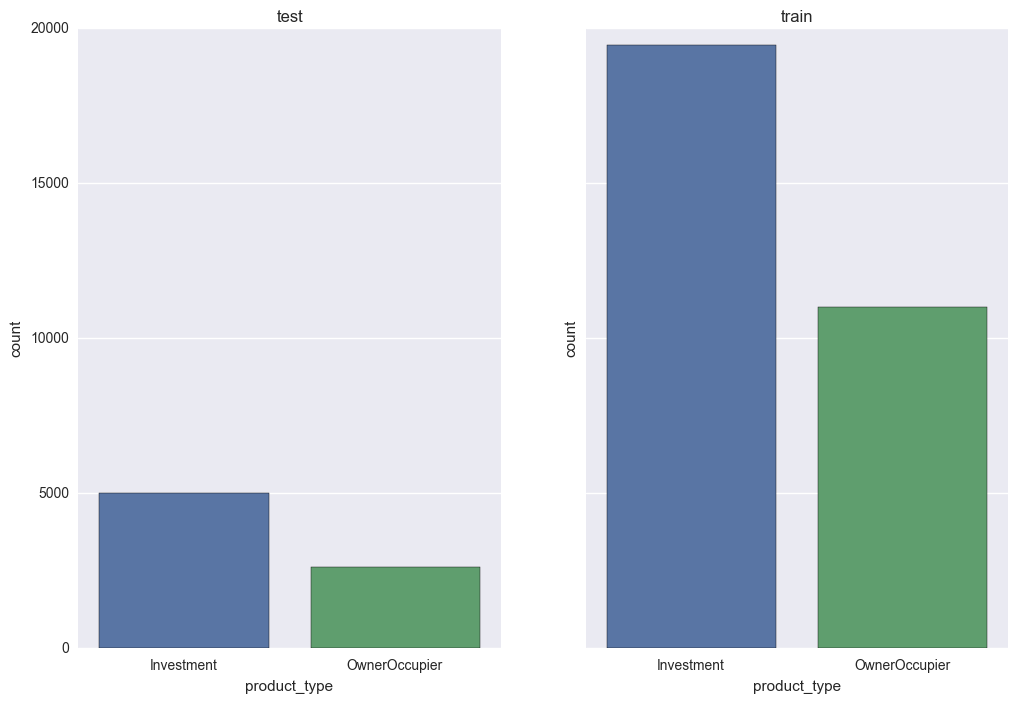

In [75]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
sns.countplot(x=test_moscowhd['product_type'], ax=ax[0])
sns.countplot(x=train_moscowhd['product_type'], ax=ax[1])
ax[0].set(title='test', xlabel='product_type')
ax[1].set(title='train', xlabel='product_type')

[<matplotlib.text.Text at 0x133f79710>, <matplotlib.text.Text at 0x1342aeed0>]

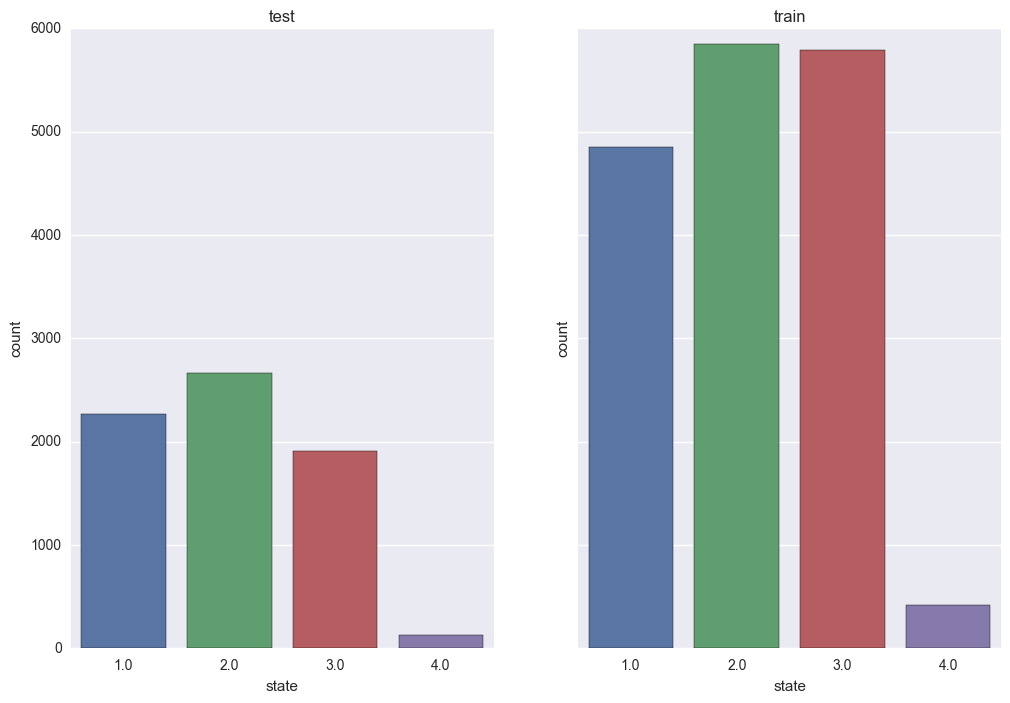

In [76]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
sns.countplot(x=test_moscowhd['state'], ax=ax[0])
sns.countplot(x=train_moscowhd['state'], ax=ax[1])
ax[0].set(title='test', xlabel='state')
ax[1].set(title='train', xlabel='state')

[<matplotlib.text.Text at 0x1343c9210>, <matplotlib.text.Text at 0x134406950>]

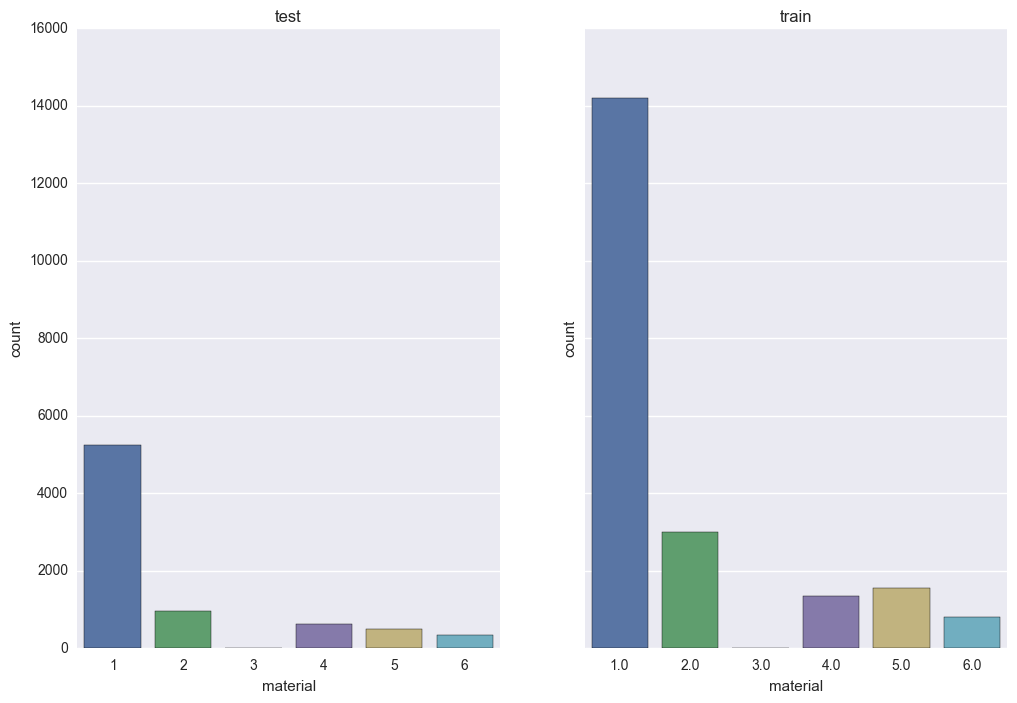

In [77]:
f, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 8), sharey=True)
sns.countplot(x=test_moscowhd['material'], ax=ax[0])
sns.countplot(x=train_moscowhd['material'], ax=ax[1])
ax[0].set(title='test', xlabel='material')
ax[1].set(title='train', xlabel='material')

NOW LET'S TAKE  A LOOK AT THE MACRO INDICATORS SPREADSHEET 

In [22]:
macro_moscowhd = pd.read_csv('~/Desktop/Russian_Housing/macro.csv', parse_dates=['timestamp'])

In [79]:
macro_moscowhd.head()

timestamp  oil_urals  gdp_quart  gdp_quart_growth  cpi  ppi  gdp_deflator  \
0 2010-01-01       76.1        NaN               NaN  NaN  NaN           NaN   
1 2010-01-02       76.1        NaN               NaN  NaN  NaN           NaN   
2 2010-01-03       76.1        NaN               NaN  NaN  NaN           NaN   
3 2010-01-04       76.1        NaN               NaN  NaN  NaN           NaN   
4 2010-01-05       76.1        NaN               NaN  NaN  NaN           NaN   

   balance_trade  balance_trade_growth  usdrub   eurrub  brent  \
0            NaN                   NaN     NaN      NaN    NaN   
1            NaN                   NaN     NaN      NaN    NaN   
2            NaN                   NaN     NaN      NaN    NaN   
3            NaN                   NaN  29.905  43.4054  80.12   
4            NaN                   NaN  29.836  42.9600  80.59   

   net_capital_export  gdp_annual  gdp_annual_growth  \
0                 NaN     38807.2          -0.078209   
1                 NaN     38807.2          -0.078209   
2                 NaN     38807.2          -0.078209   
3                 NaN     38807.2          -0.078209   
4                 NaN     38807.2          -0.078209   

   average_provision_of_build_contract  \
0                                  5.0   
1                                  5.0   
2                                  5.0   
3                                  5.0   
4                                  5.0   

   average_provision_of_build_contract_moscow  rts  micex  micex_rgbi_tr  \
0                                         NaN  NaN    NaN            NaN   
1                                         NaN  NaN    NaN            NaN   
2                                         NaN  NaN    NaN            NaN   
3                                         NaN  NaN    NaN            NaN   
4                                         NaN  NaN    NaN            NaN   

   micex_cbi_tr  deposits_value  deposits_growth  deposits_rate  \
0           NaN         7484970              NaN            NaN   
1        175.15         7484970              NaN            NaN   
2        178.66         7484970              NaN            NaN   
3        183.44         7484970              NaN            NaN   
4        183.44         7484970              NaN            NaN   

   mortgage_value  mortgage_growth  mortgage_rate        grp  grp_growth  \
0          142968              NaN          13.72  8375.8638         NaN   
1          142968              NaN          13.72  8375.8638         NaN   
2          142968              NaN          13.72  8375.8638         NaN   
3          142968              NaN          13.72  8375.8638         NaN   
4          142968              NaN          13.72  8375.8638         NaN   

   income_per_cap  real_dispos_income_per_cap_growth   salary  salary_growth  \
0         30789.2                              0.038  38410.5            NaN   
1         30789.2                              0.038  38410.5            NaN   
2         30789.2                              0.038  38410.5            NaN   
3         30789.2                              0.038  38410.5            NaN   
4         30789.2                              0.038  38410.5            NaN   

   fixed_basket  retail_trade_turnover  retail_trade_turnover_per_cap  \
0      11443.63              2882.4169                        251.484   
1      11443.63              2882.4169                        251.484   
2      11443.63              2882.4169                        251.484   
3      11443.63              2882.4169                        251.484   
4      11443.63              2882.4169                        251.484   

   retail_trade_turnover_growth  labor_force  unemployment  employment  \
0                         106.8     6436.244         0.018        0.69   
1                         106.8     6436.244         0.018        0.69   
2                         106.8     6436.244         0.018        0.69   
3 

FEATURE ENGINNEERING 

In [ ]:
from sklearn import preprocessing
import xgboost as xgb
import lightgbm as lgb

In [83]:
train_df = pd.merge(train_moscowhd, macro_moscowhd, how='left', on='timestamp')
test_df = pd.merge(test_moscowhd, macro_moscowhd, how='left', on='timestamp')
print(train_df.shape, test_df.shape)

# truncate the extreme values in price_doc #
ulimit = np.percentile(train_df.price_doc.values, 99)
llimit = np.percentile(train_df.price_doc.values, 1)
train_df['price_doc'].ix[train_df['price_doc']>ulimit] = ulimit
train_df['price_doc'].ix[train_df['price_doc']<llimit] = llimit

((30471, 396), (7662, 390))


We should convert categorical variables to numbers by label encoding! 

In [84]:
for f in train_df.columns:
    if train_df[f].dtype=='object':
        print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values.astype('str')) + list(test_df[f].values.astype('str')))
        train_df[f] = lbl.transform(list(train_df[f].values.astype('str')))
        test_df[f] = lbl.transform(list(test_df[f].values.astype('str')))
    

product_type
sub_area
culture_objects_top_25
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion
railroad_terminal_raion
big_market_raion
nuclear_reactor_raion
detention_facility_raion
water_1line
big_road1_1line
railroad_1line
ecology
child_on_acc_pre_school
modern_education_share
old_education_build_share


In [85]:
train_df["null_count"] = train_df.isnull().sum(axis=1)
test_df["null_count"] = test_df.isnull().sum(axis=1)

plt.figure(figsize=(20,12))
sns.pointplot(x='null_count', y='price_doc', data=train_df)
plt.ylabel('price_doc', fontsize=12)
plt.xlabel('null_count', fontsize=12)
plt.xticks(rotation='vertical')
plt.show()



In SRK's kernal he imputeed the missing values with some value which is outside the range of values of the column i.e. -99. I plan to come back and use mice later 

In [86]:
train_df.fillna(-99, inplace=True)
test_df.fillna(-99, inplace=True)

In [ ]:


#COOL RATIOS 

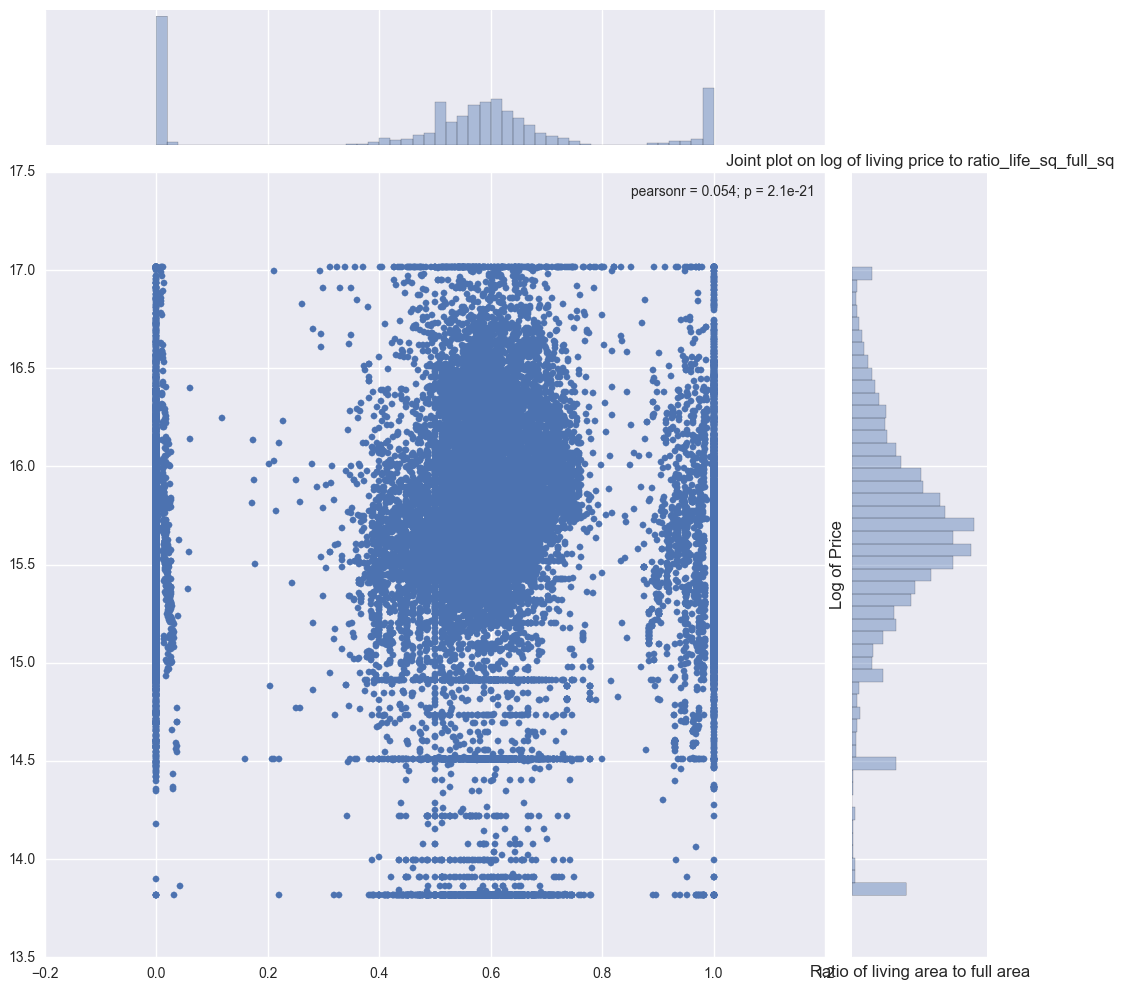

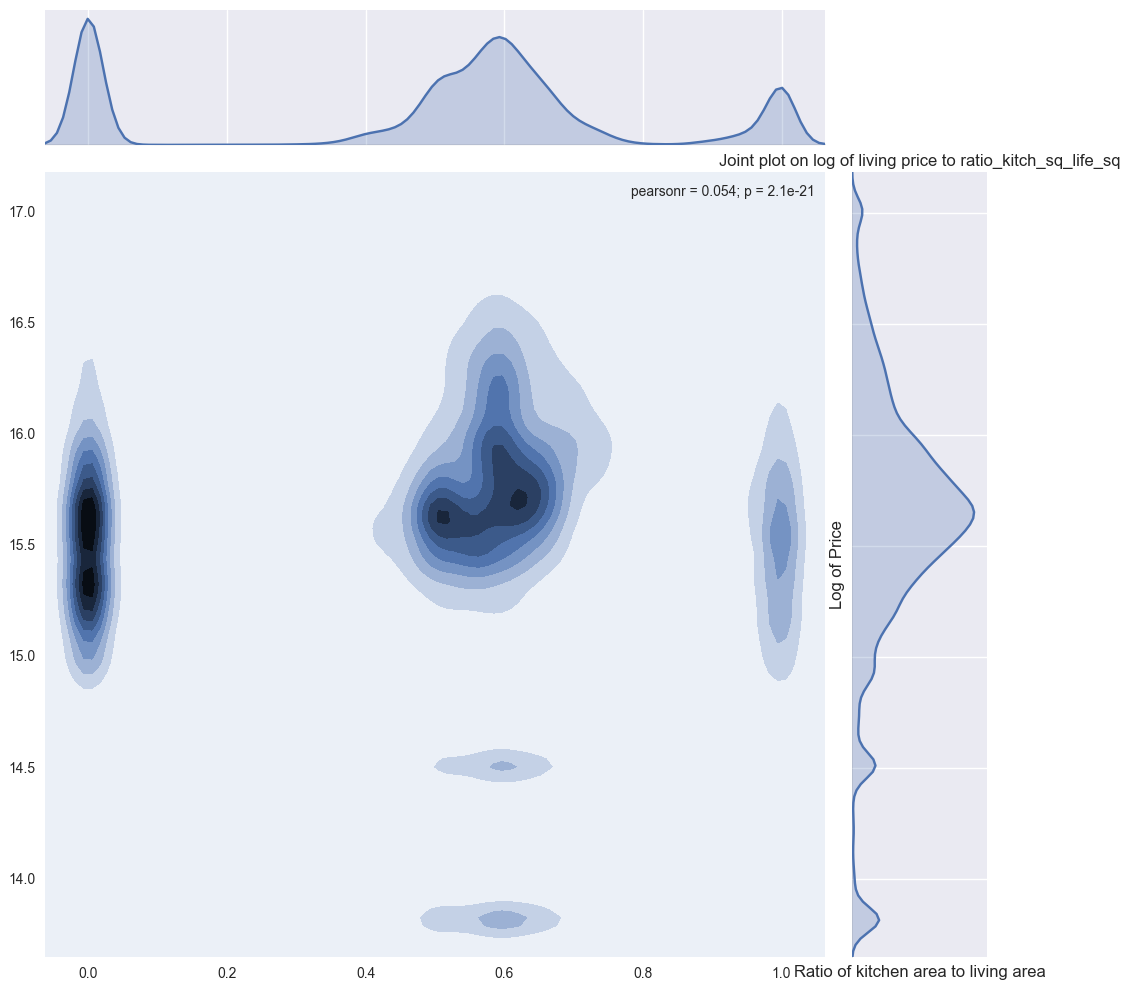

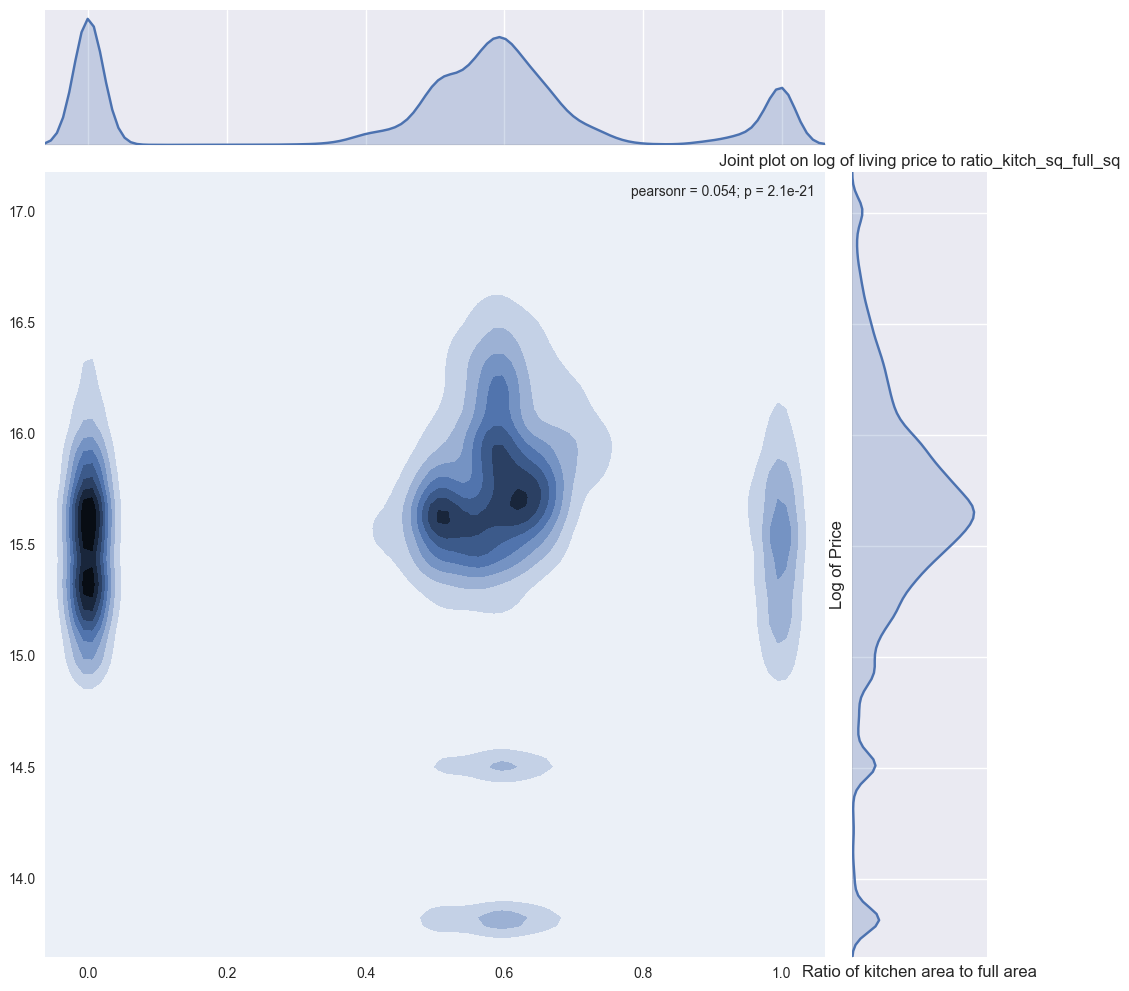

In [88]:
# ratio of living area to full area #
train_df["ratio_life_sq_full_sq"] = train_df["life_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_life_sq_full_sq"] = test_df["life_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_life_sq_full_sq"].ix[train_df["ratio_life_sq_full_sq"]<0] = 0
train_df["ratio_life_sq_full_sq"].ix[train_df["ratio_life_sq_full_sq"]>1] = 1
test_df["ratio_life_sq_full_sq"].ix[test_df["ratio_life_sq_full_sq"]<0] = 0
test_df["ratio_life_sq_full_sq"].ix[test_df["ratio_life_sq_full_sq"]>1] = 1

# ratio of kitchen area to living area #
train_df["ratio_kitch_sq_life_sq"] = train_df["kitch_sq"] / np.maximum(train_df["life_sq"].astype("float"),1)
test_df["ratio_kitch_sq_life_sq"] = test_df["kitch_sq"] / np.maximum(test_df["life_sq"].astype("float"),1)
train_df["ratio_kitch_sq_life_sq"].ix[train_df["ratio_kitch_sq_life_sq"]<0] = 0
train_df["ratio_kitch_sq_life_sq"].ix[train_df["ratio_kitch_sq_life_sq"]>1] = 1
test_df["ratio_kitch_sq_life_sq"].ix[test_df["ratio_kitch_sq_life_sq"]<0] = 0
test_df["ratio_kitch_sq_life_sq"].ix[test_df["ratio_kitch_sq_life_sq"]>1] = 1

# ratio of kitchen area to full area #
train_df["ratio_kitch_sq_full_sq"] = train_df["kitch_sq"] / np.maximum(train_df["full_sq"].astype("float"),1)
test_df["ratio_kitch_sq_full_sq"] = test_df["kitch_sq"] / np.maximum(test_df["full_sq"].astype("float"),1)
train_df["ratio_kitch_sq_full_sq"].ix[train_df["ratio_kitch_sq_full_sq"]<0] = 0
train_df["ratio_kitch_sq_full_sq"].ix[train_df["ratio_kitch_sq_full_sq"]>1] = 1
test_df["ratio_kitch_sq_full_sq"].ix[test_df["ratio_kitch_sq_full_sq"]<0] = 0
test_df["ratio_kitch_sq_full_sq"].ix[test_df["ratio_kitch_sq_full_sq"]>1] = 1

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.ratio_life_sq_full_sq.values, y=np.log1p(train_df.price_doc.values), size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Ratio of living area to full area', fontsize=12)
plt.title("Joint plot on log of living price to ratio_life_sq_full_sq")
plt.show()

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.ratio_life_sq_full_sq.values, y=np.log1p(train_df.price_doc.values), 
              kind='kde',size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Ratio of kitchen area to living area', fontsize=12)
plt.title("Joint plot on log of living price to ratio_kitch_sq_life_sq")
plt.show()

plt.figure(figsize=(12,12))
sns.jointplot(x=train_df.ratio_life_sq_full_sq.values, y=np.log1p(train_df.price_doc.values), 
              kind='kde',size=10)
plt.ylabel('Log of Price', fontsize=12)
plt.xlabel('Ratio of kitchen area to full area', fontsize=12)
plt.title("Joint plot on log of living price to ratio_kitch_sq_full_sq")
plt.show()

FEATURE ENGINEERING 

In [89]:
# floor of the house to the total number of floors in the house #
train_df["ratio_floor_max_floor"] = train_df["floor"] / train_df["max_floor"].astype("float")
test_df["ratio_floor_max_floor"] = test_df["floor"] / test_df["max_floor"].astype("float")

# num of floor from top #
train_df["floor_from_top"] = train_df["max_floor"] - train_df["floor"]
test_df["floor_from_top"] = test_df["max_floor"] - test_df["floor"]



In [90]:
train_df["extra_sq"] = train_df["full_sq"] - train_df["life_sq"]
test_df["extra_sq"] = test_df["full_sq"] - test_df["life_sq"]



In [91]:
train_df["age_of_building"] = train_df["build_year"] - train_df["year"]
test_df["age_of_building"] = test_df["build_year"] - test_df["year"]



In [92]:
def add_count(df, group_col):
    grouped_df = df.groupby(group_col)["id"].aggregate("count").reset_index()
    grouped_df.columns = [group_col, "count_"+group_col]
    df = pd.merge(df, grouped_df, on=group_col, how="left")
    return df

train_df = add_count(train_df, "yearmonth")
test_df = add_count(test_df, "yearmonth")

train_df = add_count(train_df, "yearweek")
test_df = add_count(test_df, "yearweek")

In [93]:
train_df["ratio_preschool"] = train_df["children_preschool"] / train_df["preschool_quota"].astype("float")
test_df["ratio_preschool"] = test_df["children_preschool"] / test_df["preschool_quota"].astype("float")

train_df["ratio_school"] = train_df["children_school"] / train_df["school_quota"].astype("float")
test_df["ratio_school"] = test_df["children_school"] / test_df["school_quota"].astype("float")

In [26]:
# y_train = train_df["price_doc"] 
# x_train = train_df.drop(["id", "timestamp", "price_doc"], axis=1)
# x_test = test_df.drop(["id", "timestamp"], axis=1)

See Watkins_Capstone II. Will try to merge later! 